# CMSC320: Final Tutorial
### By: Gautham Hari, Evan Guo, Arjun Rajaram

- [Introduction](#Introduction)
- [Data Collection](#Data-Collection)
    - [Collecting Rotten Tomatoes Dataset](#Collecting-Rotten-Tomatoes-Dataset)
    - [Collecting TMDB Dataset](#Collecting-TMDB-Dataset)
- [Data Processing](#Data-Processing)
    - [Processing Columns](#Processing-Columns)
    - [Data Filtering](#Data-Filtering)
    - [Data Conversion and Column Renaming](#Data-Conversion-and-Column-Renaming)
    - [Merging Dataframes](#Merging-Dataframes)
4. [Exploratory Analysis & Data Visualization](#Exploratory-Analysis-&-Data-Visualization) 
5. [Model: Analysis, Hypothesis Testing, & ML](#Model:-Analysis,-Hypothesis-Testing,-&-ML)
6. [Interpretation: Insight & Policy Decision](#Interpretation:-Insight-&-Policy-Decision)

make sure to shuffle data and maybe do a K-fold cross validation 

## Introduction

Explanation 

Intro

## Data Collection


Description of section + prose

In [1]:
import pandas as pd
import numpy as np
import json
import datetime
import matplotlib.pyplot as plt
import sklearn as sklearn
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor  
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
pd.set_option('display.max_columns', None)

C:\Users\gauth\AppData\Local\Temp\ipykernel_18580\2580437714.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Colecting Rotten Tomatoes Dataset

In [2]:
rotten_tomatoes_data=pd.read_csv('data/rotten_tomatoes/rotten_tomatoes_movies.csv')
rotten_tomatoes_movies_df = pd.DataFrame(rotten_tomatoes_data)
rotten_tomatoes_movies_df

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,runtime,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2015-11-25,119.0,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2012-09-04,90.0,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,2014-07-24,122.0,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2017-01-13,95.0,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2016-06-10,127.0,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17707,m/zoot_suit,Zoot Suit,Mexican-American gangster Henry Reyna (Daniel ...,NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,2016-04-19,104.0,MCA Universal Home Video,Rotten,56.0,9.0,Upright,74.0,1195.0,2,5,4
17708,m/zootopia,Zootopia,From the largest elephant to the smallest shre...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","J.K. Simmons, Kristen Bell, Octavia Spencer, A...",2016-03-04,2016-06-07,108.0,Walt Disney Animation Studios,Certified-Fresh,98.0,291.0,Upright,92.0,101511.0,50,285,7
17709,m/zorba_the_greek,Zorba the Greek,Traveling to inspect an abandoned mine his fat...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,2015-11-25,142.0,Fox,Fresh,80.0,10.0,Upright,86.0,7146.0,0,8,2
17710,m/zulu,Zulu,"In 1879, the Zulu nation hands colonial Britis...",Zulu patiently establishes a cast of colorful ...,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,2017-01-08,135.0,Paramount Pictures,Fresh,96.0,23.0,Upright,91.0,30193.0,6,22,1


### Collecting TMDB Dataset

In [3]:
tmdb_big_dataset=pd.read_csv('data/tmdb-box-office-prediction/TMDB_movie_dataset_v11.csv')
tmdb_big_dataset

# plt.scatter(tmdb_big_dataset['revenue'],tmdb_big_dataset['id'])


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,https://www.warnerbros.com/movies/dark-knight/,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237000000,https://www.avatar.com/movies/avatar,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,220000000,https://www.marvel.com/movies/the-avengers,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037053,683919,Ellsworth Kelly: Fragments,0.000,0,Released,2007-12-31,0,66,False,NaN,0,NaN,tt26680258,en,Ellsworth Kelly: Fragments,Cameras record artist Ellsworth Kelly as he cr...,0.600,/9RyKOGsaxStcajEN4tuWe15r1w7.jpg,NaN,Documentary,NaN,NaN,NaN,"artist, art"
1037054,683921,César,0.000,0,Released,1971-01-21,0,50,False,NaN,0,NaN,NaN,en,César,"In 1971, Jean-Daniel Pollet & Guy Seligmann di...",0.600,/qEbNDYQJrkH51jF0bZl6GOJxBDe.jpg,Documentary about French artist César Baldaccini,Documentary,NaN,France,French,"sculpture, sculptor, sculpting"
1037055,683922,Notes on Lying,0.000,0,Released,2010-06-23,0,0,False,/ejDohyGHwTqdfu72psJKbFEiI9Q.jpg,0,NaN,tt1934345,en,Notes on Lying,A cautionary tale of lying. A curious thing ha...,0.840,/pPhBv7cyuu4g7dYdBdEkcGB6NQh.jpg,NaN,Drama,Blackbird Studios,"Canada, United States of America",NaN,NaN
1037056,683923,Do Your Homework,0.000,0,Released,2017-03-21,0,75,True,NaN,0,NaN,NaN,en,Do Your Homework,She didn't want to do her homework but she was...,0.600,/sOaPqyL4op1btUxa5pg9i1kz3S2.jpg,NaN,NaN,Nubiles,United States of America,NaN,NaN


## Data Processing

In this section, we use the Pandas and NumPy libraries to clean and manipulate the dataframes. Provided below are links to the Pandas and NumPy documentation pages:

[Pandas Documentation](https://pandas.pydata.org/docs/index.html)

[NumPy Documentation](https://numpy.org/doc/stable/index.html#)

### Processing Columns

In [4]:
rotten_tomatoes_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

Useless columns to drop: homepage, poster_path, status, belongs_to_collection (80% null)

(maybe also remove cast and crew if they don't really help)

In [5]:
tmdb_big_dataset.drop(['id','status', 'overview', 'backdrop_path', 'homepage', 'imdb_id','id','original_title','poster_path','tagline','keywords'], axis=1, inplace=True)


In [6]:
rotten_tomatoes_movies_df.drop(['movie_info','rotten_tomatoes_link','critics_consensus'],axis=1,inplace=True)


### Data Filtering

In [7]:
tmdb_big_dataset=tmdb_big_dataset[(tmdb_big_dataset['revenue']>=1000000) &(tmdb_big_dataset['budget']>=1000000) & (tmdb_big_dataset['genres']) & (tmdb_big_dataset['release_date']) & (tmdb_big_dataset['runtime']) & (tmdb_big_dataset['popularity']) & (tmdb_big_dataset['vote_average']>0) ]


### Data Conversion and Column Renaming

In [8]:
for index, row in tmdb_big_dataset.iterrows():
    datetime_object = datetime.datetime.strptime(str(row['release_date']), '%Y-%m-%d')
    tmdb_big_dataset.at[index,"release_date"]=datetime_object
    tmdb_big_dataset.at[index,"release_year"]=datetime_object.year
    tmdb_big_dataset.at[index, "release_month"] = datetime_object.month
    
tmdb_big_dataset.rename(columns={'title': 'movie_title'}, inplace=True)
tmdb_big_dataset

C:\Users\gauth\AppData\Local\Temp\ipykernel_18580\3693529027.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmdb_big_dataset.at[index,"release_year"]=datetime_object.year
C:\Users\gauth\AppData\Local\Temp\ipykernel_18580\3693529027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmdb_big_dataset.at[index, "release_month"] = datetime_object.month
C:\Users\gauth\AppData\Local\Temp\ipykernel_18580\3693529027.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

,movie_title,vote_average,vote_count,release_date,revenue,runtime,adult,budget,original_language,popularity,genres,production_companies,production_countries,spoken_languages,release_year,release_month
1,Interstellar,8.417,32571,2014-11-05 00:00:00,701729206,169,False,165000000,en,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,2014.0,11.0
4,The Avengers,7.710,29166,2012-04-25 00:00:00,1518815515,143,False,220000000,en,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian",2012.0,4.0
6,Avengers: Infinity War,8.255,27713,2018-04-25 00:00:00,2052415039,149,False,300000000,en,154.340,"Adventure, Action, Science Fiction",Marvel Studios,United States of America,"English, Xhosa",2018.0,4.0
7,Fight Club,8.438,27238,1999-10-15 00:00:00,100853753,139,False,63000000,en,69.498,Drama,"Regency Enterprises, Fox 2000 Pictures, Taurus...",United States of America,English,1999.0,10.0
8,Guardians of the Galaxy,7.906,26638,2014-07-30 00:00:00,772776600,121,False,170000000,en,33.255,"Action, Science Fiction, Adventure",Marvel Studios,United States of America,English,2014.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230598,"Ay, Juancito",7.000,1,2004-06-10 00:00:00,17159458,109,False,2800000,es,0.668,Drama,Aries Cinematográfica Argentina,Argentina,Spanish,2004.0,6.0
272680,Kung Food,7.000,1,2018-08-17 00:00:00,1197984,99,False,20000000,zh,3.597,"Animation, Family","Beijing Culture, Yi Animation",South Korea,Mandarin,2018.0,8.0
281763,Mastaney,10.000,1,2023-08-25 00:00:00,16367572,145,False,2169000,pa,2.907,"Action, Drama, History","Vehli Janta Films, Omjee Star Studios, Fateh F...",India,Punjabi,2023.0,8.0
332657,Ah Girls Go Army,6.000,1,2022-02-01 00:00:00,1785000,121,False,1428000,en,7.974,"Comedy, Drama","J Team Productions, MM2 Entertainment",Singapore,"Mandarin, English",2022.0,2.0


In [9]:
lst=[]
# Basically just creating a datetime object and putting it into the columna and adding a column release_year with the year
for index, row in rotten_tomatoes_movies_df.iterrows():
    if type(row['original_release_date'])!=str:
        lst.append(index)
    else:
        datetime_object = datetime.datetime.strptime(str(row['original_release_date']), '%Y-%m-%d')
        rotten_tomatoes_movies_df.at[index,"original_release_date"]=datetime_object
        rotten_tomatoes_movies_df.at[index,"release_year"]=datetime_object.year
rotten_tomatoes_movies_df.drop(lst)
rotten_tomatoes_movies_df

,movie_title,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,runtime,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,release_year
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12 00:00:00,2015-11-25,119.0,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76,2010.0
1,Please Give,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30 00:00:00,2012-09-04,90.0,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19,2010.0
2,10,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05 00:00:00,2014-07-24,122.0,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8,1979.0
3,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13 00:00:00,2017-01-13,95.0,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0,1957.0
4,"20,000 Leagues Under The Sea",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01 00:00:00,2016-06-10,127.0,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3,1954.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17707,Zoot Suit,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02 00:00:00,2016-04-19,104.0,MCA Universal Home Video,Rotten,56.0,9.0,Upright,74.0,1195.0,2,5,4,1981.0
17708,Zootopia,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","J.K. Simmons, Kristen Bell, Octavia Spencer, A...",2016-03-04 00:00:00,2016-06-07,108.0,Walt Disney Animation Studios,Certified-Fresh,98.0,291.0,Upright,92.0,101511.0,50,285,7,2016.0
17709,Zorba the Greek,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17 00:00:00,2015-11-25,142.0,Fox,Fresh,80.0,10.0,Upright,86.0,7146.0,0,8,2,1964.0
17710,Zulu,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17 00:00:00,2017-01-08,135.0,Paramount Pictures,Fresh,96.0,23.0,Upright,91.0,30193.0,6,22,1,1964.0


### Merging Dataframes

In [10]:
movie_df=pd.merge(tmdb_big_dataset,rotten_tomatoes_movies_df,on=["movie_title","release_year"],how='inner')
movie_df

# movie_df.to_csv('finaldata.csv', sep=',', index=False, encoding='utf-8')

,movie_title,vote_average,vote_count,release_date,revenue,runtime_x,adult,budget,original_language,popularity,genres_x,production_companies,production_countries,spoken_languages,release_year,release_month,content_rating,genres_y,directors,authors,actors,original_release_date,streaming_release_date,runtime_y,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,Interstellar,8.417,32571,2014-11-05 00:00:00,701729206,169,False,165000000,en,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,2014.0,11.0,PG-13,"Action & Adventure, Science Fiction & Fantasy",Christopher Nolan,"Christopher Nolan, Jonathan Nolan","Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014-11-07 00:00:00,2016-05-24,165.0,Paramount Pictures,Certified-Fresh,72.0,364.0,Upright,86.0,175957.0,62,263,101
1,Avengers: Infinity War,8.255,27713,2018-04-25 00:00:00,2052415039,149,False,300000000,en,154.340,"Adventure, Action, Science Fiction",Marvel Studios,United States of America,"English, Xhosa",2018.0,4.0,PG-13,"Action & Adventure, Science Fiction & Fantasy",Anthony Russo,"Christopher Markus, Stephen McFeely","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",2018-04-27 00:00:00,2018-07-31,149.0,Walt Disney Pictures,Certified-Fresh,85.0,472.0,Upright,91.0,58720.0,57,400,72
2,Fight Club,8.438,27238,1999-10-15 00:00:00,100853753,139,False,63000000,en,69.498,Drama,"Regency Enterprises, Fox 2000 Pictures, Taurus...",United States of America,English,1999.0,10.0,R,"Comedy, Drama",David Fincher,Jim Uhls,"Brad Pitt, Edward Norton, Helena Bonham Carter...",1999-10-15 00:00:00,2015-11-25,139.0,20th Century Fox,Certified-Fresh,79.0,173.0,Upright,96.0,1093242.0,40,137,36
3,Guardians of the Galaxy,7.906,26638,2014-07-30 00:00:00,772776600,121,False,170000000,en,33.255,"Action, Science Fiction, Adventure",Marvel Studios,United States of America,English,2014.0,7.0,PG-13,"Action & Adventure, Science Fiction & Fantasy",James Gunn (II),"James Gunn (II), James Gunn, Nicole Perlman, D...","Chris Pratt, Zoe Saldana, Dave Bautista, Lee P...",2014-08-01 00:00:00,2015-11-15,121.0,Walt Disney Pictures,Certified-Fresh,91.0,328.0,Upright,92.0,255582.0,59,300,28
4,Django Unchained,8.171,24672,2012-12-25 00:00:00,425368238,165,False,100000000,en,54.224,"Drama, Western","The Weinstein Company, Columbia Pictures",United States of America,"English, French, German",2012.0,12.0,R,"Drama, Western",Quentin Tarantino,Quentin Tarantino,"Jamie Foxx, Christoph Waltz, Leonardo DiCaprio...",2012-12-25 00:00:00,2017-03-24,165.0,The Weinstein Co.,Certified-Fresh,87.0,288.0,Upright,91.0,429231.0,55,250,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,The Sea of Grass,6.200,23,1947-04-25 00:00:00,4689000,123,False,2349000,en,3.541,"Drama, Western",Metro-Goldwyn-Mayer,United States of America,"English, Italian",1947.0,4.0,NR,"Classics, Drama, Western",Elia Kazan,"Marguerite Roberts, Vincent Lawrence","Spencer Tracy, Katharine Hepburn, Melvyn Dougl...",1947-04-25 00:00:00,2012-04-16,122.0,Warner Home Video,Rotten,14.0,7.0,Spilled,35.0,149.0,3,1,6
2321,Middle of Nowhere,6.196,23,2012-10-12 00:00:00,2368060,101,False,2000000,en,4.384,Drama,"Forward Movement, Kandoo Films",United States of America,English,2012.0,10.0,R,Drama,Ava DuVernay,Ava DuVernay,"Emayatzy E. Corinealdi, David Oyelowo, Omari H...",2012-10-12 00:00:00,2016-11-30,101.0,AFFRM,Certified-Fresh,88.0,50.0,Upright,64.0,2643.0,22,44,6
2322,Faithful,5.200,21,1996-04-03 00:00:00,2104439,91,False,13000000,en,4.889,"Comedy, Crime, Drama","New Line Cinema, Miramax",United States of America,English,1996.0,4.0,R,"Comedy, Drama",Paul Mazursky,Chazz Palminteri,"Cher, Chazz Palminteri, Ryan O'Neal, Paul Maz

In [11]:
movie_df['adult'].unique() # all are False, so we can drop this column


array([False])

In [12]:

movie_df.drop(['adult'], axis= 1, inplace= True)
movie_df.head()

,movie_title,vote_average,vote_count,release_date,revenue,runtime_x,budget,original_language,popularity,genres_x,production_companies,production_countries,spoken_languages,release_year,release_month,content_rating,genres_y,directors,authors,actors,original_release_date,streaming_release_date,runtime_y,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,Interstellar,8.417,32571,2014-11-05 00:00:00,701729206,169,165000000,en,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,2014.0,11.0,PG-13,"Action & Adventure, Science Fiction & Fantasy",Christopher Nolan,"Christopher Nolan, Jonathan Nolan","Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014-11-07 00:00:00,2016-05-24,165.0,Paramount Pictures,Certified-Fresh,72.0,364.0,Upright,86.0,175957.0,62,263,101
1,Avengers: Infinity War,8.255,27713,2018-04-25 00:00:00,2052415039,149,300000000,en,154.340,"Adventure, Action, Science Fiction",Marvel Studios,United States of America,"English, Xhosa",2018.0,4.0,PG-13,"Action & Adventure, Science Fiction & Fantasy",Anthony Russo,"Christopher Markus, Stephen McFeely","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",2018-04-27 00:00:00,2018-07-31,149.0,Walt Disney Pictures,Certified-Fresh,85.0,472.0,Upright,91.0,58720.0,57,400,72
2,Fight Club,8.438,27238,1999-10-15 00:00:00,100853753,139,63000000,en,69.498,Drama,"Regency Enterprises, Fox 2000 Pictures, Taurus...",United States of America,English,1999.0,10.0,R,"Comedy, Drama",David Fincher,Jim Uhls,"Brad Pitt, Edward Norton, Helena Bonham Carter...",1999-10-15 00:00:00,2015-11-25,139.0,20th Century Fox,Certified-Fresh,79.0,173.0,Upright,96.0,1093242.0,40,137,36
3,Guardians of the Galaxy,7.906,26638,2014-07-30 00:00:00,772776600,121,170000000,en,33.255,"Action, Science Fiction, Adventure",Marvel Studios,United States of America,English,2014.0,7.0,PG-13,"Action & Adventure, Science Fiction & Fantasy",James Gunn (II),"James Gunn (II), James Gunn, Nicole Perlman, D...","Chris Pratt, Zoe Saldana, Dave Bautista, Lee P...",2014-08-01 00:00:00,2015-11-15,121.0,Walt Disney Pictures,Certified-Fresh,91.0,328.0,Upright,92.0,255582.0,59,300,28
4,Django Unchained,8.171,24672,2012-12-25 00:00:00,425368238,165,100000000,en,54.224,"Drama, Western","The Weinstein Company, Columbia Pictures",United States of America,"English, French, German",2012.0,12.0,R,"Drama, Western",Quentin Tarantino,Quentin Tarantino,"Jamie Foxx, Christoph Waltz, Leonardo DiCaprio...",2012-12-25 00:00:00,2017-03-24,165.0,The Weinstein Co.,Certified-Fresh,87.0,288.0,Upright,91.0,429231.0,55,250,38


In [13]:
movie_df['original_language'].unique() # a bit tough to tell what these different language acronyms stand for, maybe drop this column?

array(['en', 'it', 'es', 'ja', 'ko', 'de', 'fr', 'cn', 'fa', 'zh', 'tr',
       'hi', 'hu', 'da', 'ru'], dtype=object)

In [14]:
movie_df.isnull().sum()

movie_title                          0
vote_average                         0
vote_count                           0
release_date                         0
revenue                              0
runtime_x                            0
budget                               0
original_language                    0
popularity                           0
genres_x                             0
production_companies                 5
production_countries                 3
spoken_languages                     1
release_year                         0
release_month                        0
content_rating                       0
genres_y                             0
directors                           19
authors                             36
actors                               5
original_release_date                0
streaming_release_date              16
runtime_y                           12
production_company                  10
tomatometer_status                   3
tomatometer_rating       

In [15]:
# dropping authors and audience status because they aren't very helpful and they result in a loss of a fair amount of rows
movie_df.drop(['authors', 'audience_status', 'streaming_release_date', 'actors'], axis= 1, inplace= True)



Dropping rows for features with less than 10 null values and can't be sensibly imputed



Dropping rows for features with less than 10 null values and can't be sensibly imputed

In [16]:
movie_df = movie_df.dropna(subset = ['production_companies', 'production_countries', 'spoken_languages', 'production_company', 'tomatometer_count', 'audience_rating', 'audience_count', 'tomatometer_status', 'tomatometer_rating', 'tomatometer_count', 'directors'])

movie_df
# note: for production_company, we can maybe cross check with the production_companies feature and use that to impute any null vals for production_company assuming
# production_companies isn't null for that row either

# note: is there a good way to impute audience rating?

,movie_title,vote_average,vote_count,release_date,revenue,runtime_x,budget,original_language,popularity,genres_x,production_companies,production_countries,spoken_languages,release_year,release_month,content_rating,genres_y,directors,original_release_date,runtime_y,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,Interstellar,8.417,32571,2014-11-05 00:00:00,701729206,169,165000000,en,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,2014.0,11.0,PG-13,"Action & Adventure, Science Fiction & Fantasy",Christopher Nolan,2014-11-07 00:00:00,165.0,Paramount Pictures,Certified-Fresh,72.0,364.0,86.0,175957.0,62,263,101
1,Avengers: Infinity War,8.255,27713,2018-04-25 00:00:00,2052415039,149,300000000,en,154.340,"Adventure, Action, Science Fiction",Marvel Studios,United States of America,"English, Xhosa",2018.0,4.0,PG-13,"Action & Adventure, Science Fiction & Fantasy",Anthony Russo,2018-04-27 00:00:00,149.0,Walt Disney Pictures,Certified-Fresh,85.0,472.0,91.0,58720.0,57,400,72
2,Fight Club,8.438,27238,1999-10-15 00:00:00,100853753,139,63000000,en,69.498,Drama,"Regency Enterprises, Fox 2000 Pictures, Taurus...",United States of America,English,1999.0,10.0,R,"Comedy, Drama",David Fincher,1999-10-15 00:00:00,139.0,20th Century Fox,Certified-Fresh,79.0,173.0,96.0,1093242.0,40,137,36
3,Guardians of the Galaxy,7.906,26638,2014-07-30 00:00:00,772776600,121,170000000,en,33.255,"Action, Science Fiction, Adventure",Marvel Studios,United States of America,English,2014.0,7.0,PG-13,"Action & Adventure, Science Fiction & Fantasy",James Gunn (II),2014-08-01 00:00:00,121.0,Walt Disney Pictures,Certified-Fresh,91.0,328.0,92.0,255582.0,59,300,28
4,Django Unchained,8.171,24672,2012-12-25 00:00:00,425368238,165,100000000,en,54.224,"Drama, Western","The Weinstein Company, Columbia Pictures",United States of America,"English, French, German",2012.0,12.0,R,"Drama, Western",Quentin Tarantino,2012-12-25 00:00:00,165.0,The Weinstein Co.,Certified-Fresh,87.0,288.0,91.0,429231.0,55,250,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,The Sea of Grass,6.200,23,1947-04-25 00:00:00,4689000,123,2349000,en,3.541,"Drama, Western",Metro-Goldwyn-Mayer,United States of America,"English, Italian",1947.0,4.0,NR,"Classics, Drama, Western",Elia Kazan,1947-04-25 00:00:00,122.0,Warner Home Video,Rotten,14.0,7.0,35.0,149.0,3,1,6
2321,Middle of Nowhere,6.196,23,2012-10-12 00:00:00,2368060,101,2000000,en,4.384,Drama,"Forward Movement, Kandoo Films",United States of America,English,2012.0,10.0,R,Drama,Ava DuVernay,2012-10-12 00:00:00,101.0,AFFRM,Certified-Fresh,88.0,50.0,64.0,2643.0,22,44,6
2322,Faithful,5.200,21,1996-04-03 00:00:00,2104439,91,13000000,en,4.889,"Comedy, Crime, Drama","New Line Cinema, Miramax",United States of America,English,1996.0,4.0,R,"Comedy, Drama",Paul Mazursky,1996-04-05 00:00:00,88.0,New Line Home Entertainment,Rotten,7.0,15.0,49.0,1626.0,6,1,14
2323,Heartbeeps,3.912,17,1981-12-18 00:00:00,2154696,79,12000000,en,4.933,"Comedy, Romance, Family",Universal Pictures,United States of America,English,1981.0,12.0,PG,"Comedy, Science Fiction & Fantasy",Allan Arkush,1981-12-18 00:00:00,79.0,Universal Studios,Rotten,0.0,6.0,23.0,1460.0,0,0,6


In [17]:
movie_df['runtime'] = 0.0

for index,row in movie_df.iterrows():
    if pd.isnull(row['runtime_y']): # if runtime_y is nul, just use runtime_x
        movie_df.at[index, 'runtime'] = float(row['runtime_x'])
    else:
        movie_df.at[index, 'runtime'] = (float(row['runtime_x']) + row['runtime_y']) / 2

movie_df.head()

C:\Users\gauth\AppData\Local\Temp\ipykernel_18580\3026071175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['runtime'] = 0.0


,movie_title,vote_average,vote_count,release_date,revenue,runtime_x,budget,original_language,popularity,genres_x,production_companies,production_countries,spoken_languages,release_year,release_month,content_rating,genres_y,directors,original_release_date,runtime_y,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,runtime
0,Interstellar,8.417,32571,2014-11-05 00:00:00,701729206,169,165000000,en,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,2014.0,11.0,PG-13,"Action & Adventure, Science Fiction & Fantasy",Christopher Nolan,2014-11-07 00:00:00,165.0,Paramount Pictures,Certified-Fresh,72.0,364.0,86.0,175957.0,62,263,101,167.0
1,Avengers: Infinity War,8.255,27713,2018-04-25 00:00:00,2052415039,149,300000000,en,154.340,"Adventure, Action, Science Fiction",Marvel Studios,United States of America,"English, Xhosa",2018.0,4.0,PG-13,"Action & Adventure, Science Fiction & Fantasy",Anthony Russo,2018-04-27 00:00:00,149.0,Walt Disney Pictures,Certified-Fresh,85.0,472.0,91.0,58720.0,57,400,72,149.0
2,Fight Club,8.438,27238,1999-10-15 00:00:00,100853753,139,63000000,en,69.498,Drama,"Regency Enterprises, Fox 2000 Pictures, Taurus...",United States of America,English,1999.0,10.0,R,"Comedy, Drama",David Fincher,1999-10-15 00:00:00,139.0,20th Century Fox,Certified-Fresh,79.0,173.0,96.0,1093242.0,40,137,36,139.0
3,Guardians of the Galaxy,7.906,26638,2014-07-30 00:00:00,772776600,121,170000000,en,33.255,"Action, Science Fiction, Adventure",Marvel Studios,United States of America,English,2014.0,7.0,PG-13,"Action & Adventure, Science Fiction & Fantasy",James Gunn (II),2014-08-01 00:00:00,121.0,Walt Disney Pictures,Certified-Fresh,91.0,328.0,92.0,255582.0,59,300,28,121.0
4,Django Unchained,8.171,24672,2012-12-25 00:00:00,425368238,165,100000000,en,54.224,"Drama, Western","The Weinstein Company, Columbia Pictures",United States of America,"English, French, German",2012.0,12.0,R,"Drama, Western",Quentin Tarantino,2012-12-25 00:00:00,165.0,The Weinstein Co.,Certified-Fresh,87.0,288.0,91.0,429231.0,55,250,38,165.0


In [18]:
movie_df.rename(columns={'genres_y' : 'genres'}, inplace= True)
for index, row in movie_df.iterrows():
    genres = row['genres'].split(",")
    movie_df.at[index, 'genres'] = genres[0]

C:\Users\gauth\AppData\Local\Temp\ipykernel_18580\2174444149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df.rename(columns={'genres_y' : 'genres'}, inplace= True)


In [19]:
# movie_df = movie_df[movie_df['runtime_y'].isnull()]
# movie_df[203]['runtime_y']
movie_df.columns

Index(['movie_title', 'vote_average', 'vote_count', 'release_date', 'revenue',
       'runtime_x', 'budget', 'original_language', 'popularity', 'genres_x',
       'production_companies', 'production_countries', 'spoken_languages',
       'release_year', 'release_month', 'content_rating', 'genres',
       'directors', 'original_release_date', 'runtime_y', 'production_company',
       'tomatometer_status', 'tomatometer_rating', 'tomatometer_count',
       'audience_rating', 'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count',
       'runtime'],
      dtype='object')

Taking average of the two runtime columns

In [20]:
movie_df['runtime'] = 0.0

for index,row in movie_df.iterrows():
    if pd.isnull(row['runtime_y']): # if runtime_y is nul, just use runtime_x
        movie_df.at[index, 'runtime'] = float(row['runtime_x'])
    else:
        movie_df.at[index, 'runtime'] = (float(row['runtime_x']) + row['runtime_y']) / 2

movie_df.head()

C:\Users\gauth\AppData\Local\Temp\ipykernel_18580\3026071175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['runtime'] = 0.0


,movie_title,vote_average,vote_count,release_date,revenue,runtime_x,budget,original_language,popularity,genres_x,production_companies,production_countries,spoken_languages,release_year,release_month,content_rating,genres,directors,original_release_date,runtime_y,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,runtime
0,Interstellar,8.417,32571,2014-11-05 00:00:00,701729206,169,165000000,en,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,2014.0,11.0,PG-13,Action & Adventure,Christopher Nolan,2014-11-07 00:00:00,165.0,Paramount Pictures,Certified-Fresh,72.0,364.0,86.0,175957.0,62,263,101,167.0
1,Avengers: Infinity War,8.255,27713,2018-04-25 00:00:00,2052415039,149,300000000,en,154.340,"Adventure, Action, Science Fiction",Marvel Studios,United States of America,"English, Xhosa",2018.0,4.0,PG-13,Action & Adventure,Anthony Russo,2018-04-27 00:00:00,149.0,Walt Disney Pictures,Certified-Fresh,85.0,472.0,91.0,58720.0,57,400,72,149.0
2,Fight Club,8.438,27238,1999-10-15 00:00:00,100853753,139,63000000,en,69.498,Drama,"Regency Enterprises, Fox 2000 Pictures, Taurus...",United States of America,English,1999.0,10.0,R,Comedy,David Fincher,1999-10-15 00:00:00,139.0,20th Century Fox,Certified-Fresh,79.0,173.0,96.0,1093242.0,40,137,36,139.0
3,Guardians of the Galaxy,7.906,26638,2014-07-30 00:00:00,772776600,121,170000000,en,33.255,"Action, Science Fiction, Adventure",Marvel Studios,United States of America,English,2014.0,7.0,PG-13,Action & Adventure,James Gunn (II),2014-08-01 00:00:00,121.0,Walt Disney Pictures,Certified-Fresh,91.0,328.0,92.0,255582.0,59,300,28,121.0
4,Django Unchained,8.171,24672,2012-12-25 00:00:00,425368238,165,100000000,en,54.224,"Drama, Western","The Weinstein Company, Columbia Pictures",United States of America,"English, French, German",2012.0,12.0,R,Drama,Quentin Tarantino,2012-12-25 00:00:00,165.0,The Weinstein Co.,Certified-Fresh,87.0,288.0,91.0,429231.0,55,250,38,165.0


In [21]:
movie_df.drop(['runtime_x', 'runtime_y', 'genres_x'], axis= 1, inplace= True)
movie_df.head()

C:\Users\gauth\AppData\Local\Temp\ipykernel_18580\1197659717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df.drop(['runtime_x', 'runtime_y', 'genres_x'], axis= 1, inplace= True)


,movie_title,vote_average,vote_count,release_date,revenue,budget,original_language,popularity,production_companies,production_countries,spoken_languages,release_year,release_month,content_rating,genres,directors,original_release_date,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,runtime
0,Interstellar,8.417,32571,2014-11-05 00:00:00,701729206,165000000,en,140.241,"Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,2014.0,11.0,PG-13,Action & Adventure,Christopher Nolan,2014-11-07 00:00:00,Paramount Pictures,Certified-Fresh,72.0,364.0,86.0,175957.0,62,263,101,167.0
1,Avengers: Infinity War,8.255,27713,2018-04-25 00:00:00,2052415039,300000000,en,154.340,Marvel Studios,United States of America,"English, Xhosa",2018.0,4.0,PG-13,Action & Adventure,Anthony Russo,2018-04-27 00:00:00,Walt Disney Pictures,Certified-Fresh,85.0,472.0,91.0,58720.0,57,400,72,149.0
2,Fight Club,8.438,27238,1999-10-15 00:00:00,100853753,63000000,en,69.498,"Regency Enterprises, Fox 2000 Pictures, Taurus...",United States of America,English,1999.0,10.0,R,Comedy,David Fincher,1999-10-15 00:00:00,20th Century Fox,Certified-Fresh,79.0,173.0,96.0,1093242.0,40,137,36,139.0
3,Guardians of the Galaxy,7.906,26638,2014-07-30 00:00:00,772776600,170000000,en,33.255,Marvel Studios,United States of America,English,2014.0,7.0,PG-13,Action & Adventure,James Gunn (II),2014-08-01 00:00:00,Walt Disney Pictures,Certified-Fresh,91.0,328.0,92.0,255582.0,59,300,28,121.0
4,Django Unchained,8.171,24672,2012-12-25 00:00:00,425368238,100000000,en,54.224,"The Weinstein Company, Columbia Pictures",United States of America,"English, French, German",2012.0,12.0,R,Drama,Quentin Tarantino,2012-12-25 00:00:00,The Weinstein Co.,Certified-Fresh,87.0,288.0,91.0,429231.0,55,250,38,165.0


In [22]:
movie_df.rename(columns={'genres_y' : 'genres'}, inplace= True)

C:\Users\gauth\AppData\Local\Temp\ipykernel_18580\360152609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df.rename(columns={'genres_y' : 'genres'}, inplace= True)


For genres, taking the first genre in the list of genres and then one hot encoding it

In [23]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2285 entries, 0 to 2324
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   movie_title                       2285 non-null   object 
 1   vote_average                      2285 non-null   float64
 2   vote_count                        2285 non-null   int64  
 3   release_date                      2285 non-null   object 
 4   revenue                           2285 non-null   int64  
 5   budget                            2285 non-null   int64  
 6   original_language                 2285 non-null   object 
 7   popularity                        2285 non-null   float64
 8   production_companies              2285 non-null   object 
 9   production_countries              2285 non-null   object 
 10  spoken_languages                  2285 non-null   object 
 11  release_year                      2285 non-null   float64
 12  release_mon

In [24]:
for index, row in movie_df.iterrows():
    genres = row['genres'].split(",")
    movie_df.at[index, 'genres'] = genres[0]

Representing production_companies, spoken_languages, production_countries, and directors as a number

In [25]:
movie_df['num_prod_companies'] = 0
movie_df['num_spoken_languages'] = 0
movie_df['num_prod_countries'] = 0
movie_df['num_directors'] = 0


for index, row in movie_df.iterrows():
    prod_companies = row['production_companies'].split(",")
    spoken_langauges = row['spoken_languages'].split(",")
    prod_countries = row['production_countries'].split(",")
    directors = row['directors'].split(",")

    movie_df.at[index, 'num_prod_companies'] = len(prod_companies)
    movie_df.at[index, 'num_spoken_languages'] = len(spoken_langauges)
    movie_df.at[index, 'num_prod_countries'] = len(prod_countries)
    movie_df.at[index, 'num_directors'] = len(directors)

movie_df.drop(['production_companies', 'spoken_languages', 'production_countries', 'directors', 'original_release_date'], axis= 1, inplace= True)
movie_df

C:\Users\gauth\AppData\Local\Temp\ipykernel_18580\615929201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['num_prod_companies'] = 0
C:\Users\gauth\AppData\Local\Temp\ipykernel_18580\615929201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['num_spoken_languages'] = 0
C:\Users\gauth\AppData\Local\Temp\ipykernel_18580\615929201.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,movie_title,vote_average,vote_count,release_date,revenue,budget,original_language,popularity,release_year,release_month,content_rating,genres,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,runtime,num_prod_companies,num_spoken_languages,num_prod_countries,num_directors
0,Interstellar,8.417,32571,2014-11-05 00:00:00,701729206,165000000,en,140.241,2014.0,11.0,PG-13,Action & Adventure,Paramount Pictures,Certified-Fresh,72.0,364.0,86.0,175957.0,62,263,101,167.0,3,1,2,1
1,Avengers: Infinity War,8.255,27713,2018-04-25 00:00:00,2052415039,300000000,en,154.340,2018.0,4.0,PG-13,Action & Adventure,Walt Disney Pictures,Certified-Fresh,85.0,472.0,91.0,58720.0,57,400,72,149.0,1,2,1,1
2,Fight Club,8.438,27238,1999-10-15 00:00:00,100853753,63000000,en,69.498,1999.0,10.0,R,Comedy,20th Century Fox,Certified-Fresh,79.0,173.0,96.0,1093242.0,40,137,36,139.0,7,1,1,1
3,Guardians of the Galaxy,7.906,26638,2014-07-30 00:00:00,772776600,170000000,en,33.255,2014.0,7.0,PG-13,Action & Adventure,Walt Disney Pictures,Certified-Fresh,91.0,328.0,92.0,255582.0,59,300,28,121.0,1,1,1,1
4,Django Unchained,8.171,24672,2012-12-25 00:00:00,425368238,100000000,en,54.224,2012.0,12.0,R,Drama,The Weinstein Co.,Certified-Fresh,87.0,288.0,91.0,429231.0,55,250,38,165.0,2,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,The Sea of Grass,6.200,23,1947-04-25 00:00:00,4689000,2349000,en,3.541,1947.0,4.0,NR,Classics,Warner Home Video,Rotten,14.0,7.0,35.0,149.0,3,1,6,122.5,1,2,1,1
2321,Middle of Nowhere,6.196,23,2012-10-12 00:00:00,2368060,2000000,en,4.384,2012.0,10.0,R,Drama,AFFRM,Certified-Fresh,88.0,50.0,64.0,2643.0,22,44,6,101.0,2,1,1,1
2322,Faithful,5.200,21,1996-04-03 00:00:00,2104439,13000000,en,4.889,1996.0,4.0,R,Comedy,New Line Home Entertainment,Rotten,7.0,15.0,49.0,1626.0,6,1,14,89.5,2,1,1,1
2323,Heartbeeps,3.912,17,1981-12-18 00:00:00,2154696,12000000,en,4.933,1981.0,12.0,PG,Comedy,Universal Studios,Rotten,0.0,6.0,23.0,1460.0,0,0,6,79.0,1,1,1,1


In [26]:
movie_df['release_decade'] = (movie_df['release_year'] // 10) * 10
movie_df

C:\Users\gauth\AppData\Local\Temp\ipykernel_18580\3604952398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['release_decade'] = (movie_df['release_year'] // 10) * 10


,movie_title,vote_average,vote_count,release_date,revenue,budget,original_language,popularity,release_year,release_month,content_rating,genres,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,runtime,num_prod_companies,num_spoken_languages,num_prod_countries,num_directors,release_decade
0,Interstellar,8.417,32571,2014-11-05 00:00:00,701729206,165000000,en,140.241,2014.0,11.0,PG-13,Action & Adventure,Paramount Pictures,Certified-Fresh,72.0,364.0,86.0,175957.0,62,263,101,167.0,3,1,2,1,2010.0
1,Avengers: Infinity War,8.255,27713,2018-04-25 00:00:00,2052415039,300000000,en,154.340,2018.0,4.0,PG-13,Action & Adventure,Walt Disney Pictures,Certified-Fresh,85.0,472.0,91.0,58720.0,57,400,72,149.0,1,2,1,1,2010.0
2,Fight Club,8.438,27238,1999-10-15 00:00:00,100853753,63000000,en,69.498,1999.0,10.0,R,Comedy,20th Century Fox,Certified-Fresh,79.0,173.0,96.0,1093242.0,40,137,36,139.0,7,1,1,1,1990.0
3,Guardians of the Galaxy,7.906,26638,2014-07-30 00:00:00,772776600,170000000,en,33.255,2014.0,7.0,PG-13,Action & Adventure,Walt Disney Pictures,Certified-Fresh,91.0,328.0,92.0,255582.0,59,300,28,121.0,1,1,1,1,2010.0
4,Django Unchained,8.171,24672,2012-12-25 00:00:00,425368238,100000000,en,54.224,2012.0,12.0,R,Drama,The Weinstein Co.,Certified-Fresh,87.0,288.0,91.0,429231.0,55,250,38,165.0,2,3,1,1,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,The Sea of Grass,6.200,23,1947-04-25 00:00:00,4689000,2349000,en,3.541,1947.0,4.0,NR,Classics,Warner Home Video,Rotten,14.0,7.0,35.0,149.0,3,1,6,122.5,1,2,1,1,1940.0
2321,Middle of Nowhere,6.196,23,2012-10-12 00:00:00,2368060,2000000,en,4.384,2012.0,10.0,R,Drama,AFFRM,Certified-Fresh,88.0,50.0,64.0,2643.0,22,44,6,101.0,2,1,1,1,2010.0
2322,Faithful,5.200,21,1996-04-03 00:00:00,2104439,13000000,en,4.889,1996.0,4.0,R,Comedy,New Line Home Entertainment,Rotten,7.0,15.0,49.0,1626.0,6,1,14,89.5,2,1,1,1,1990.0
2323,Heartbeeps,3.912,17,1981-12-18 00:00:00,2154696,12000000,en,4.933,1981.0,12.0,PG,Comedy,Universal Studios,Rotten,0.0,6.0,23.0,1460.0,0,0,6,79.0,1,1,1,1,1980.0


Cleaning notes:
- done: need to drop rows with null values for features we want to use
- done: we have two runtimes (take average of both) and two genres (pick Y)
- done: how do we want to represent features with values that are lists? Think about features like production countries (num countries or OHE?), directors (do number?), spoken languages (get number), genres (take first and one hot encode), production company (num comapnies), original language (one hot encode), content rating (one hot encode)
- done: keeping tomatometer status (for graphing purposes, drop for ML)

Key features in mind: 

- budget
- genres
- rotten tomatoes score
- language
- popularity (figure out what this means/how it's calculated)
- runtime

Primary question: what's the most important predictor of revenue? How accurate is our revenue prediction (use metrics like MSE maybe)

## Exploratory Analysis & Data Visualization

In [27]:
movie_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2285 entries, 0 to 2324
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   movie_title                       2285 non-null   object 
 1   vote_average                      2285 non-null   float64
 2   vote_count                        2285 non-null   int64  
 3   release_date                      2285 non-null   object 
 4   revenue                           2285 non-null   int64  
 5   budget                            2285 non-null   int64  
 6   original_language                 2285 non-null   object 
 7   popularity                        2285 non-null   float64
 8   release_year                      2285 non-null   float64
 9   release_month                     2285 non-null   float64
 10  content_rating                    2285 non-null   object 
 11  genres                            2285 non-null   object 
 12  production_

After processing and cleaning our data, we can explore ann visualize our data to best get a feel for how it can be used to perform prediction on box office score. 


The first thing we will do is graph box office scores against time to visualize how box office scores have not only changed with time, but also the range of box office scores that our dataset contains. 

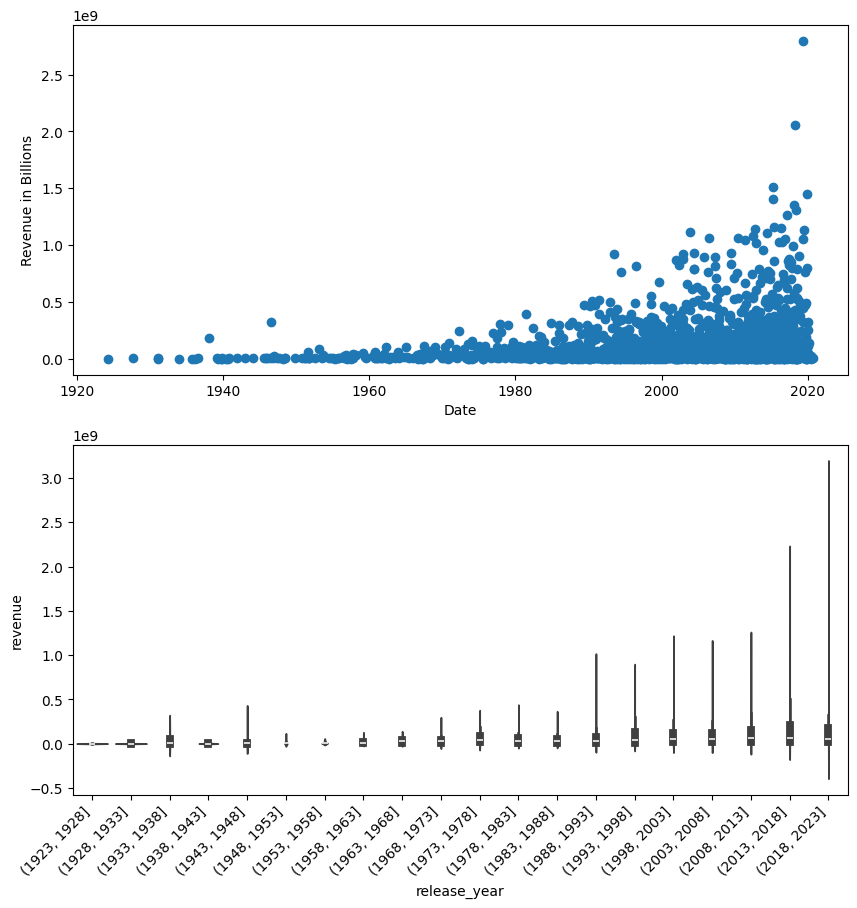

In [28]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.scatter(movie_df['release_date'],movie_df['revenue'])
plt.ylabel("Revenue in Billions")
plt.xlabel("Date")

plt.subplot(2,1,2)
years = list(np.arange(1923,2024,5))
bins = pd.cut(movie_df['release_year'], bins=years)
sns.violinplot(x=bins,y=movie_df['revenue'])
plt.xticks(rotation=45, ha='right')

plt.show()





<Axes: xlabel='release_year'>

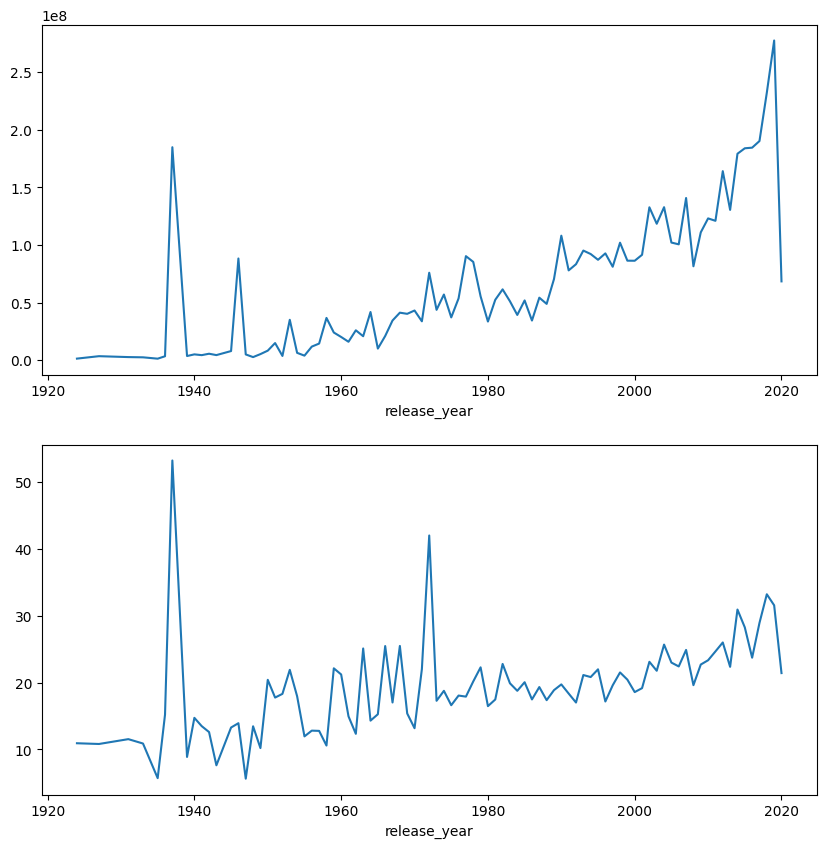

In [29]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
release_year_groupings= movie_df.groupby(['release_year'])
revenue_groupings = release_year_groupings['revenue'].mean()
sns.lineplot(x=revenue_groupings.keys(),y=revenue_groupings.values)
plt.subplot(2,1,2)

popularity_groupings = release_year_groupings['popularity'].mean()
sns.lineplot(x=popularity_groupings.keys(),y=popularity_groupings.values)



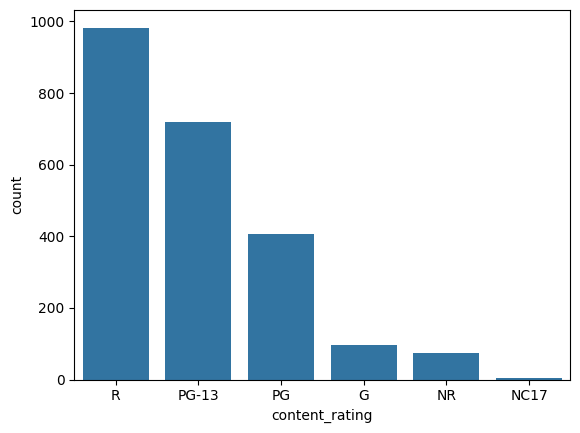

In [30]:
    # Ocurrences of ratings
content_ratings_count = movie_df['content_rating'].value_counts()
x_content_ratings = content_ratings_count.keys()
y_occurrences=content_ratings_count.values
ax=sns.barplot(data=content_ratings_count)
plt.show()

C:\Users\gauth\AppData\Local\Temp\ipykernel_18580\1879034445.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=movie_df['content_rating'],y=movie_df['revenue'],palette='Set2')


<Axes: xlabel='content_rating', ylabel='revenue'>

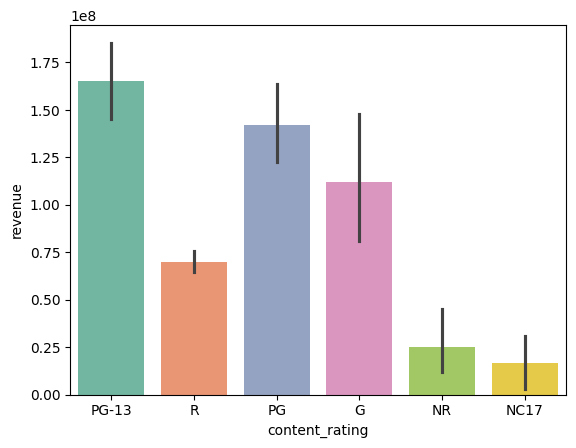

In [31]:
sns.barplot(x=movie_df['content_rating'],y=movie_df['revenue'],palette='Set2')

<Axes: xlabel='budget', ylabel='revenue'>

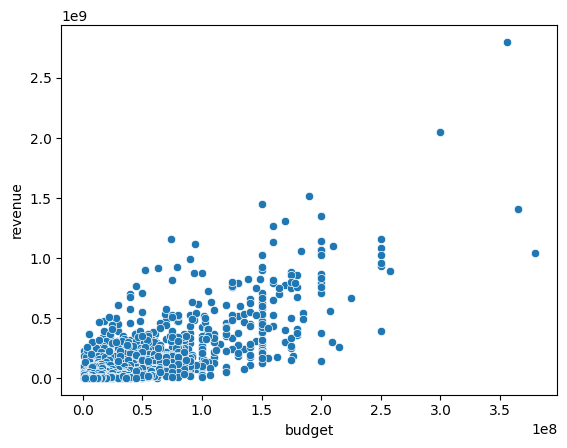

In [32]:
sns.scatterplot(x=movie_df['budget'],y=movie_df['revenue'])


C:\Users\gauth\AppData\Local\Temp\ipykernel_18580\3261417046.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=movie_df,x='tomatometer_status',y='revenue',palette='magma')


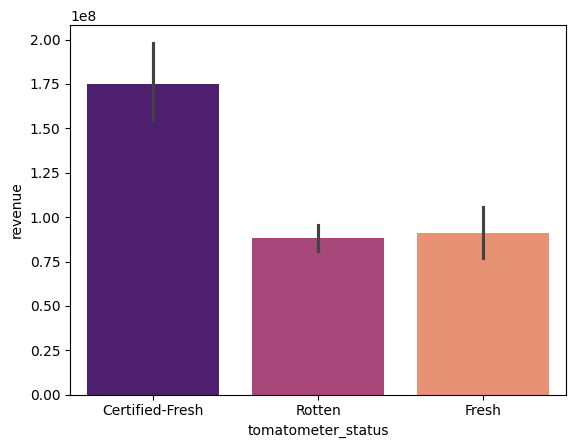

In [33]:
ax=sns.barplot(data=movie_df,x='tomatometer_status',y='revenue',palette='magma')



C:\Users\gauth\AppData\Local\Temp\ipykernel_18580\3513976594.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=movie_df,x='num_spoken_languages',y='revenue',palette='viridis')


<Axes: xlabel='num_spoken_languages', ylabel='revenue'>

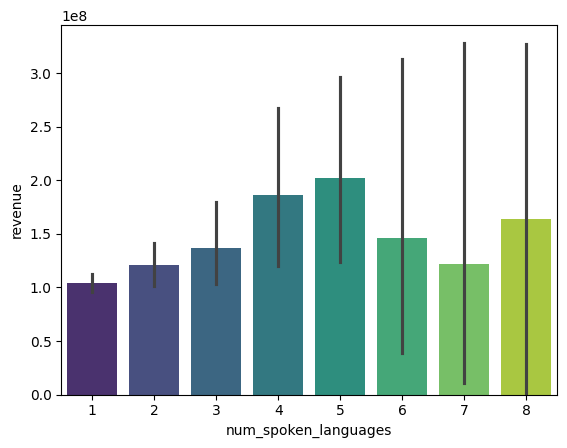

In [34]:
sns.barplot(data=movie_df,x='num_spoken_languages',y='revenue',palette='viridis')


C:\Users\gauth\AppData\Local\Temp\ipykernel_18580\4053770431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['runtime_bins'] = (movie_df['runtime'] // 10) * 10


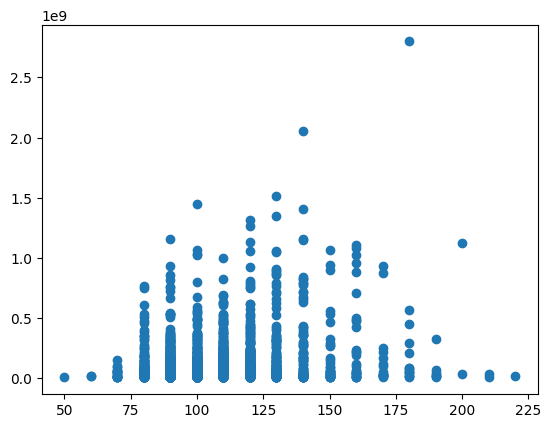

In [35]:
movie_df['runtime_bins'] = (movie_df['runtime'] // 10) * 10

plt.scatter(movie_df['runtime_bins'],movie_df['revenue'])


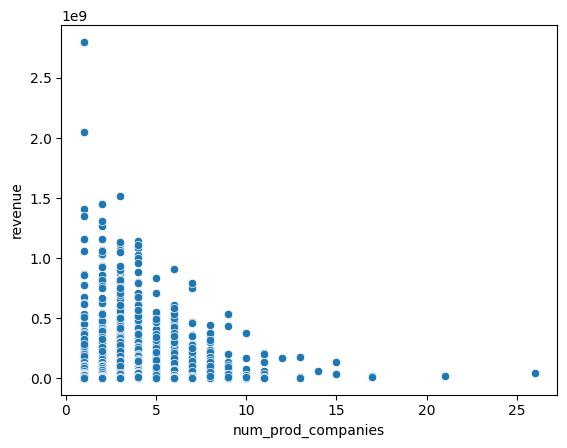

In [36]:
sns.scatterplot(data = movie_df, x = 'num_prod_companies', y = 'revenue')
plt.show()

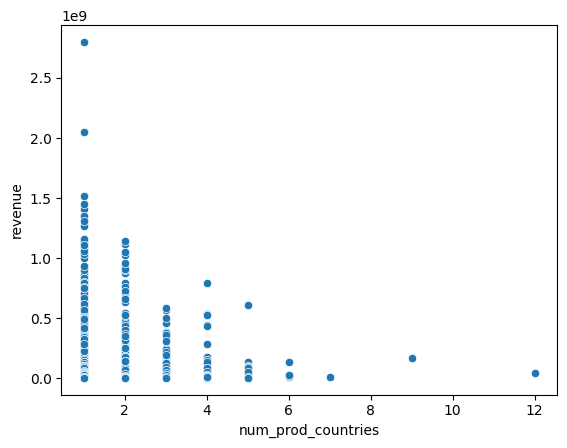

In [37]:

sns.scatterplot(data = movie_df, x = 'num_prod_countries', y = 'revenue')
plt.show()

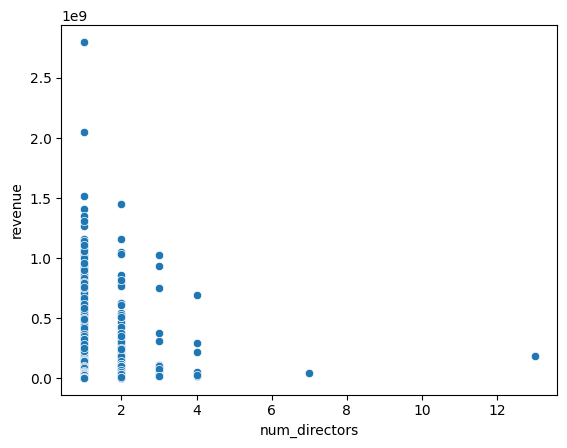

In [38]:
sns.scatterplot(data = movie_df, x = 'num_directors', y = 'revenue')
plt.show()

C:\Users\gauth\AppData\Local\Temp\ipykernel_18580\2854650839.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)


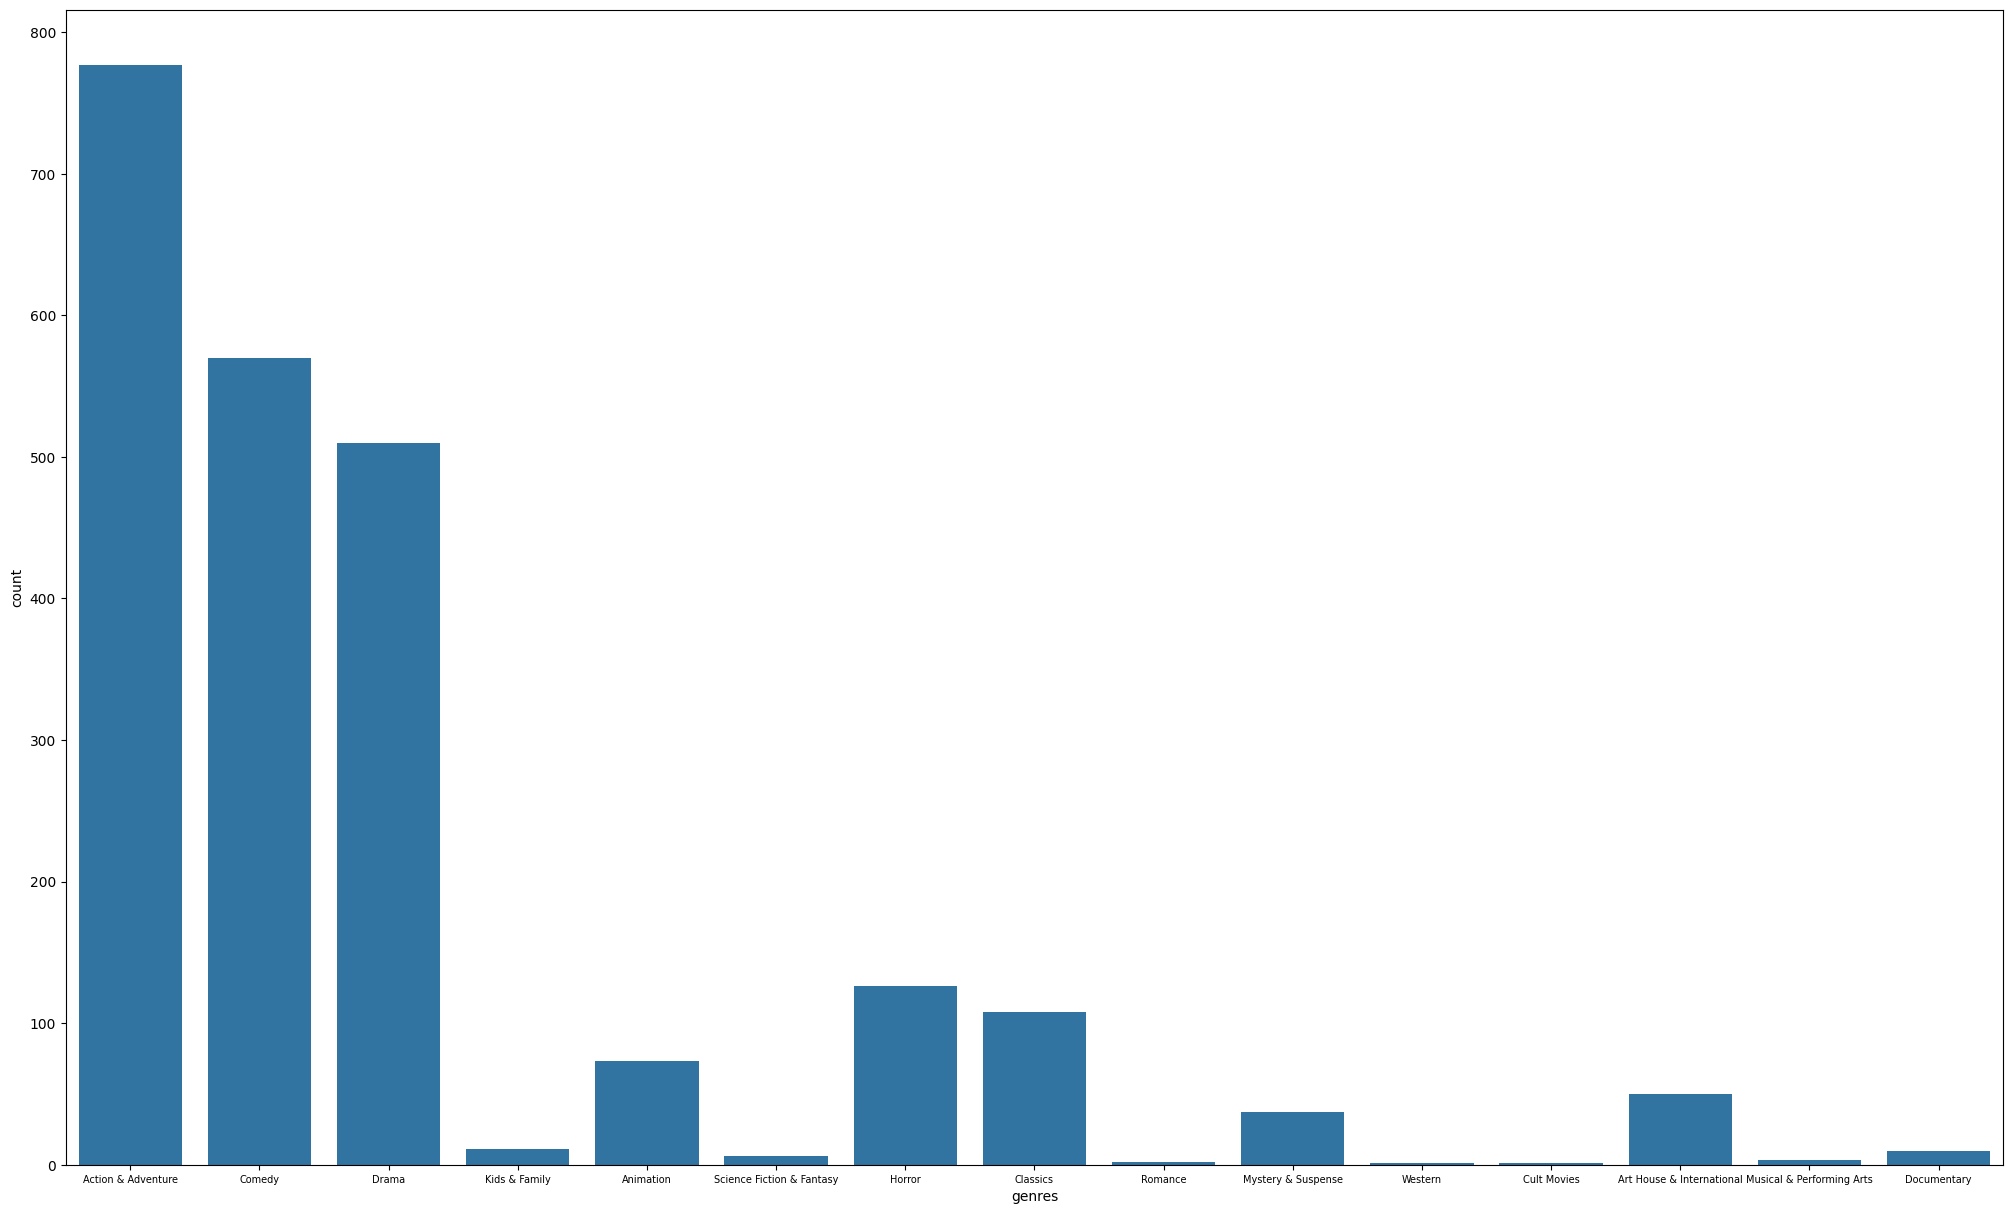

In [39]:

ax = sns.countplot(data= movie_df, x = "genres")
ax.figure.set_size_inches(25, 15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.show()

C:\Users\gauth\AppData\Local\Temp\ipykernel_18580\2916387330.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)


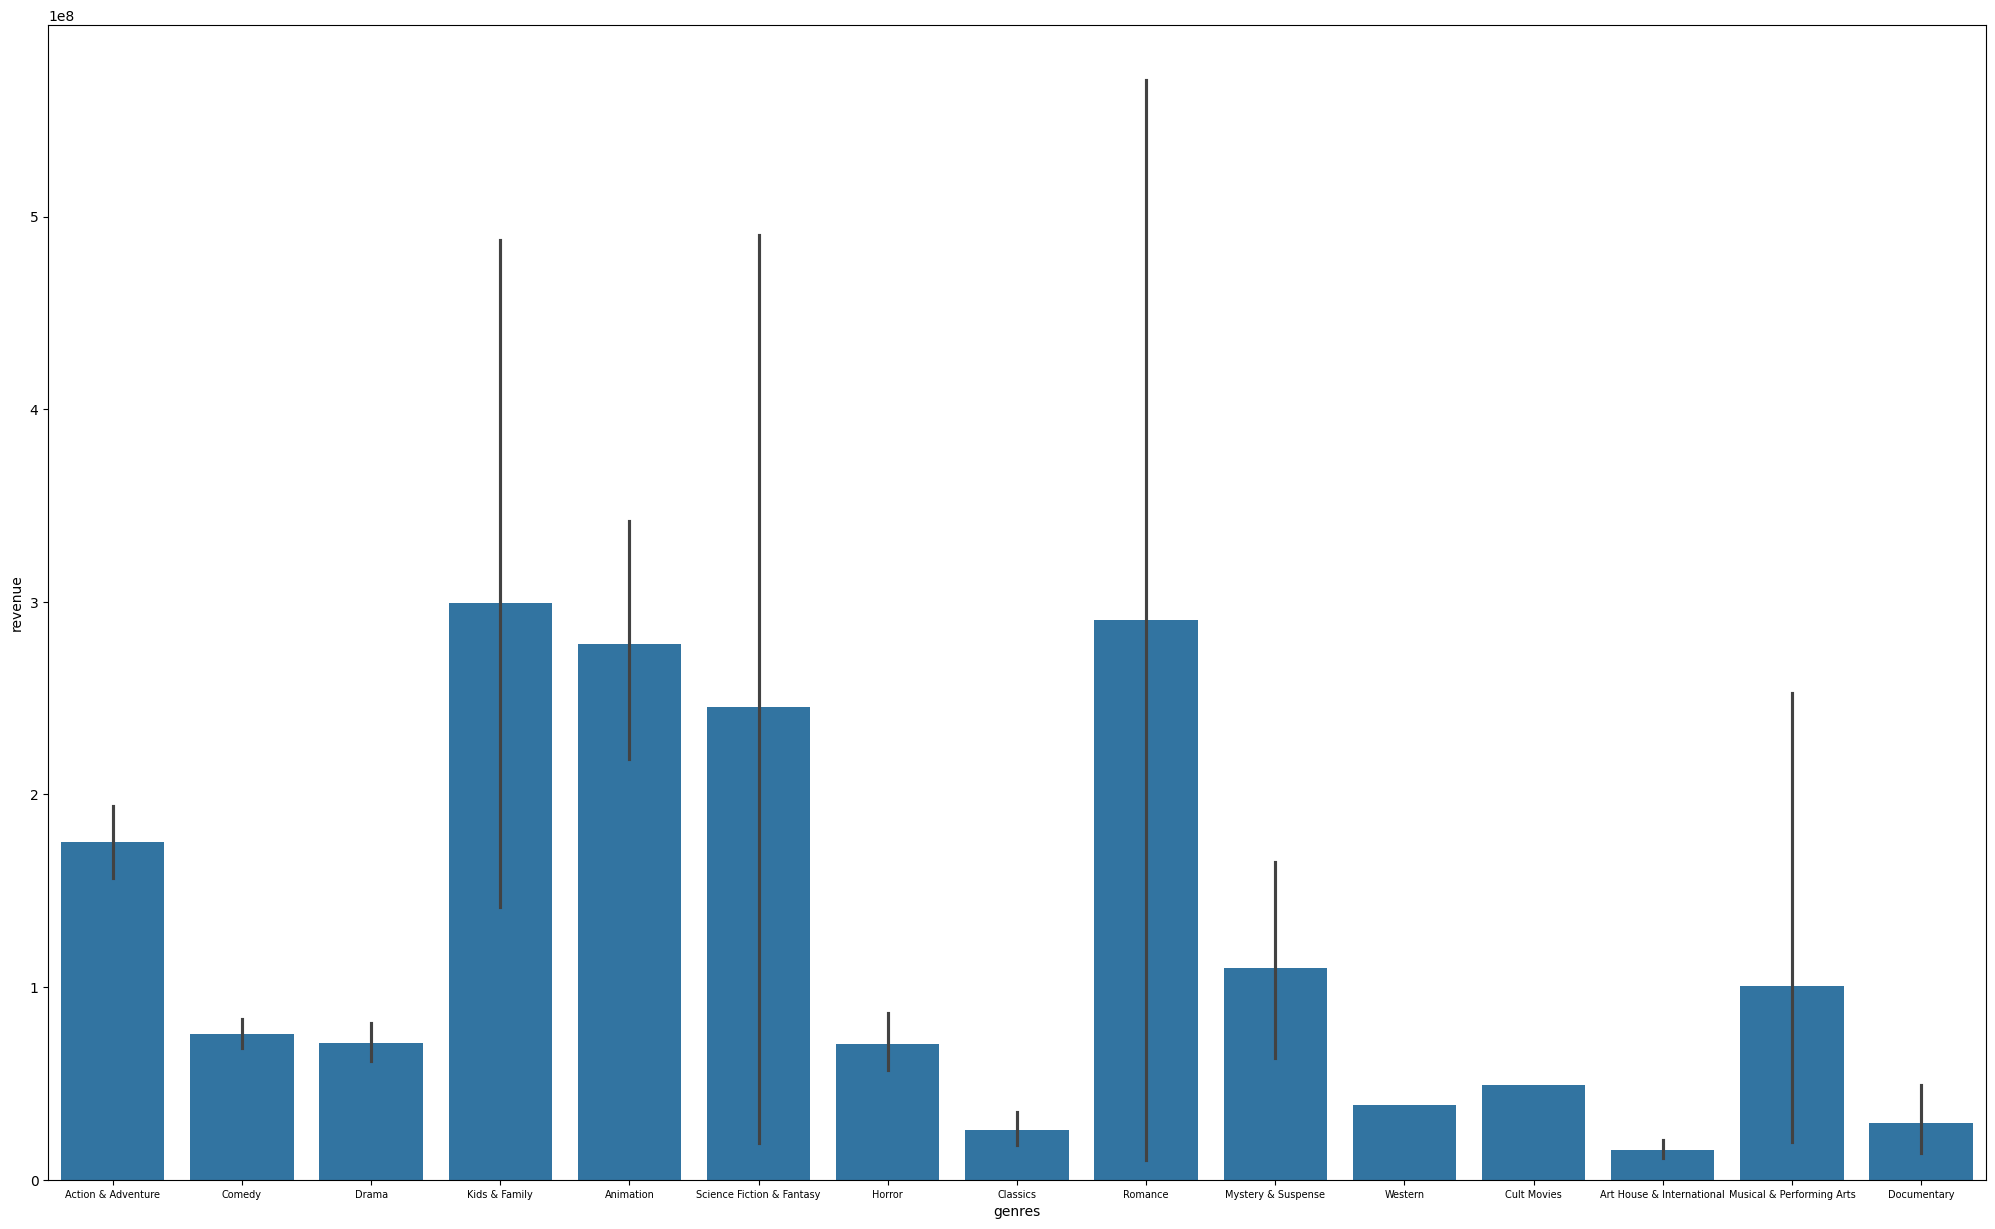

In [40]:
ax = sns.barplot(data= movie_df, x = 'genres', y = 'revenue')
ax.figure.set_size_inches(25, 15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.show()

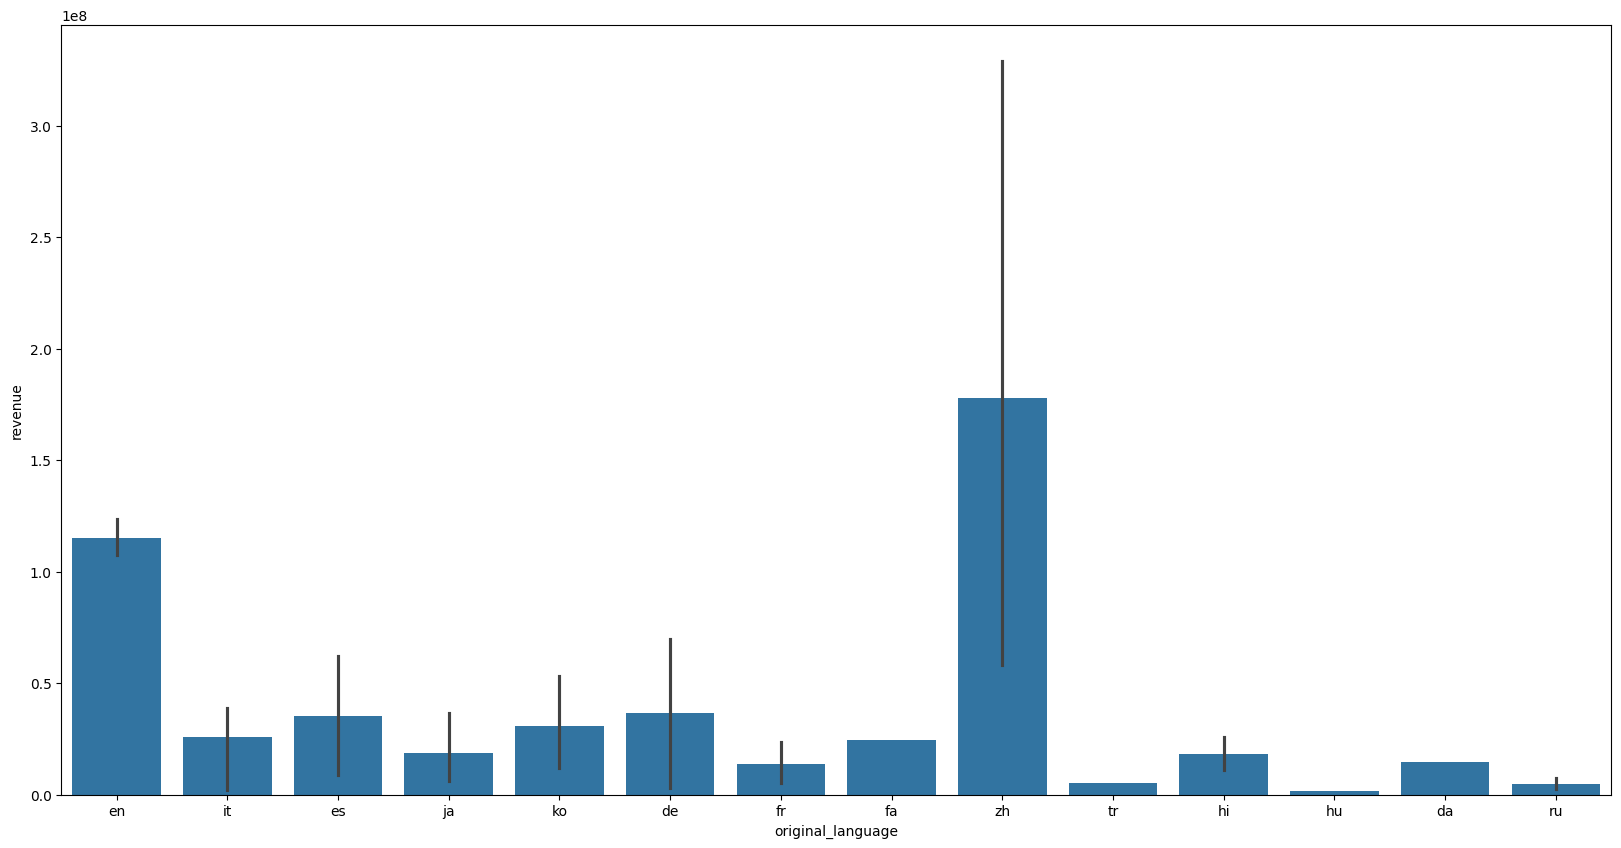

In [41]:
ax = sns.barplot(data= movie_df, x = 'original_language', y = 'revenue')
ax.figure.set_size_inches(20, 10)
#ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.show()

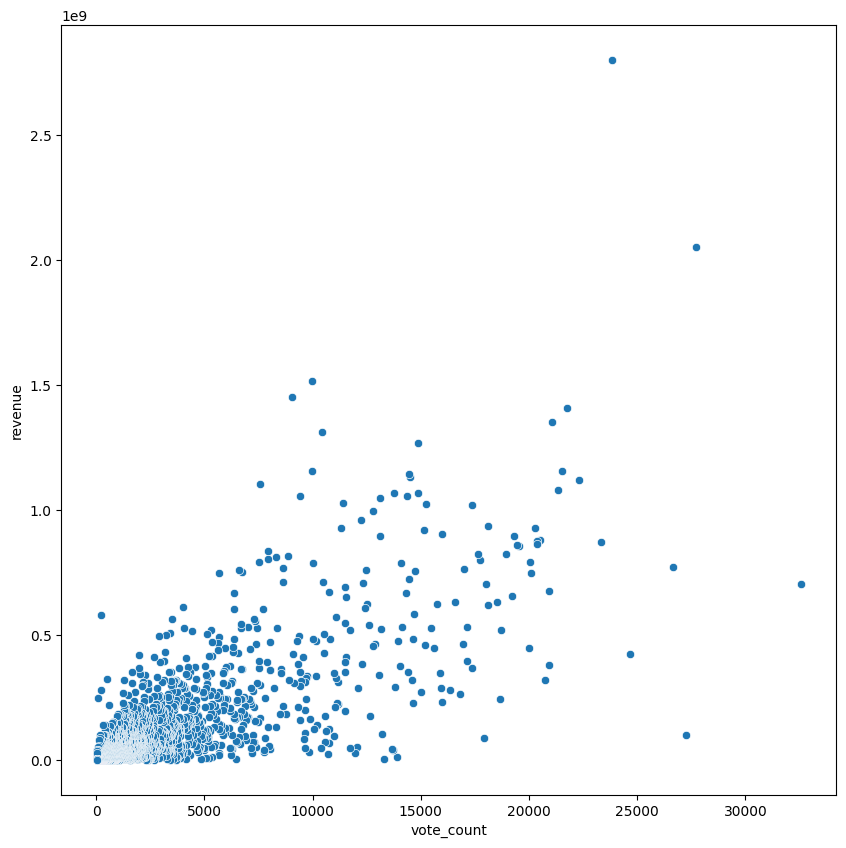

In [42]:
ax = sns.scatterplot(data= movie_df, x = 'vote_count', y = 'revenue')
ax.figure.set_size_inches(10, 10)
#ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.show()

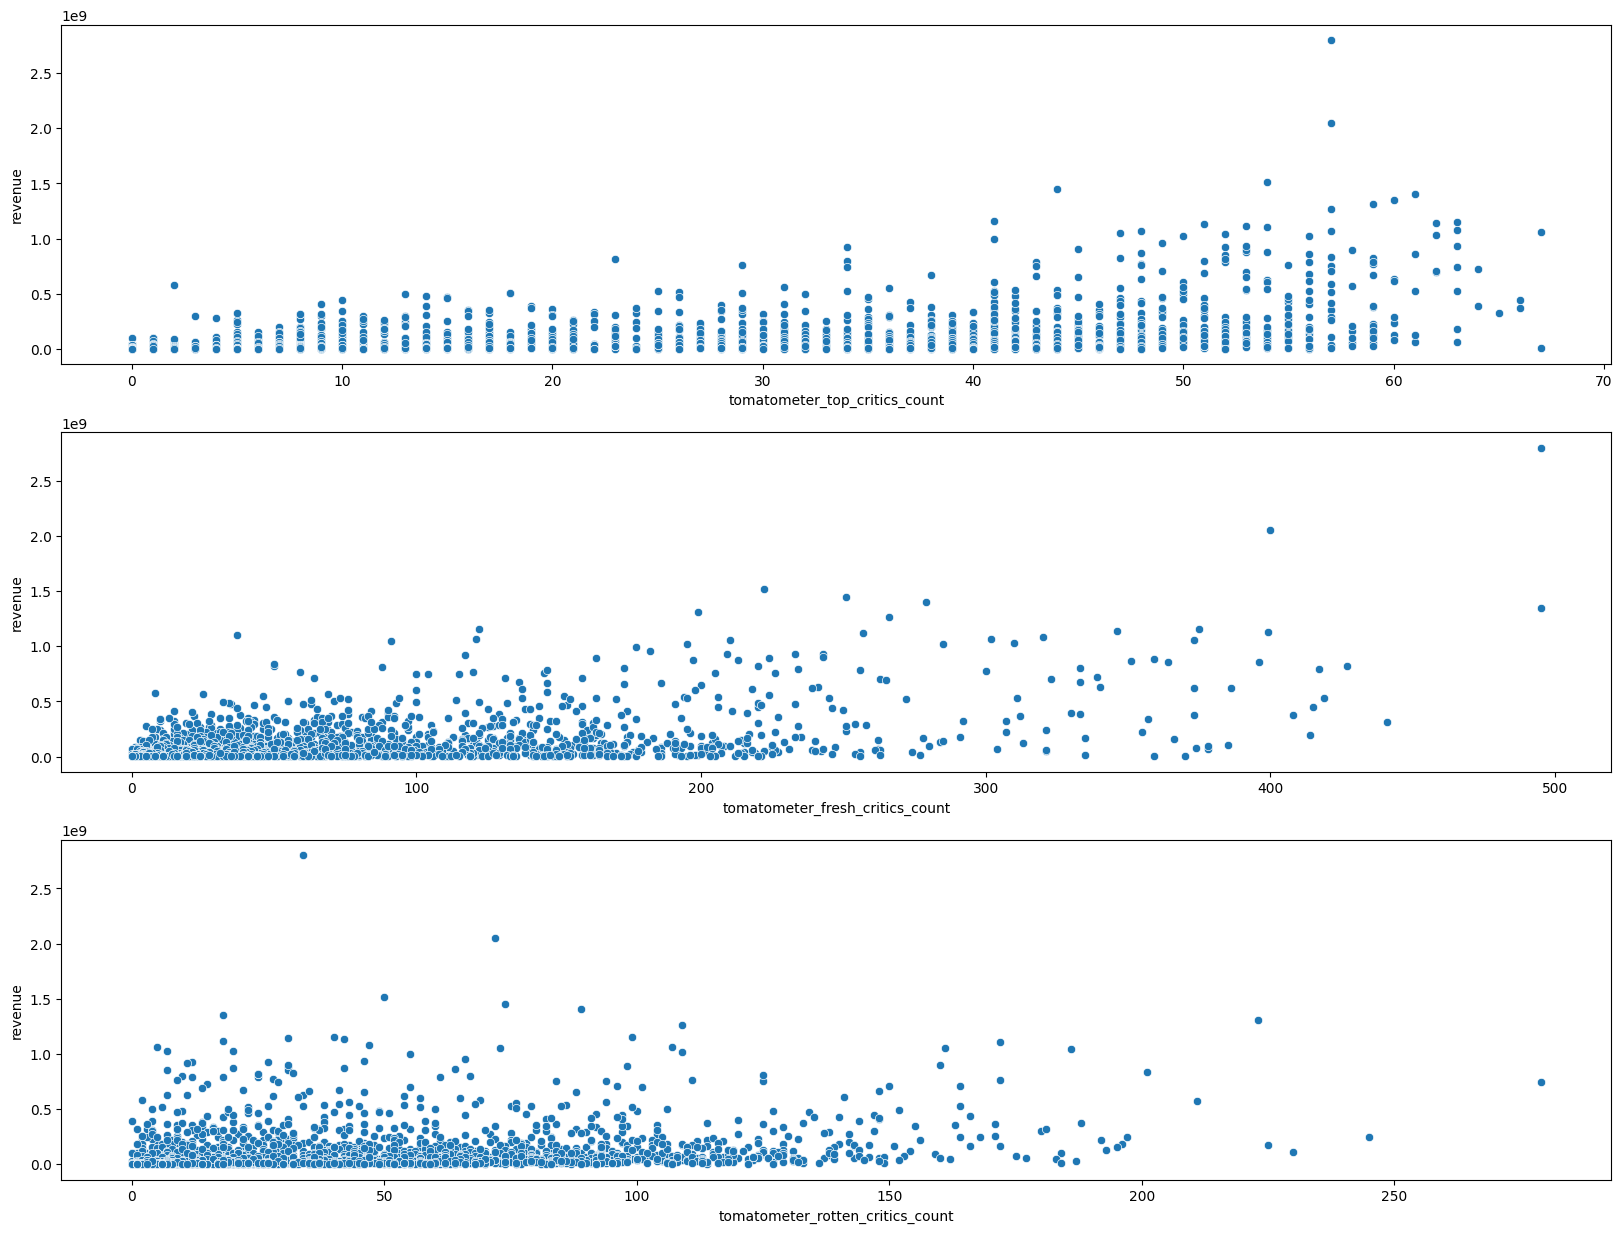

In [43]:
plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
sns.scatterplot(data= movie_df,x= 'tomatometer_top_critics_count', y = 'revenue')

plt.subplot(3,1,2)
sns.scatterplot(data= movie_df,x= 'tomatometer_fresh_critics_count', y = 'revenue')

plt.subplot(3,1,3)
sns.scatterplot(data= movie_df,x= 'tomatometer_rotten_critics_count', y = 'revenue')

plt.show()

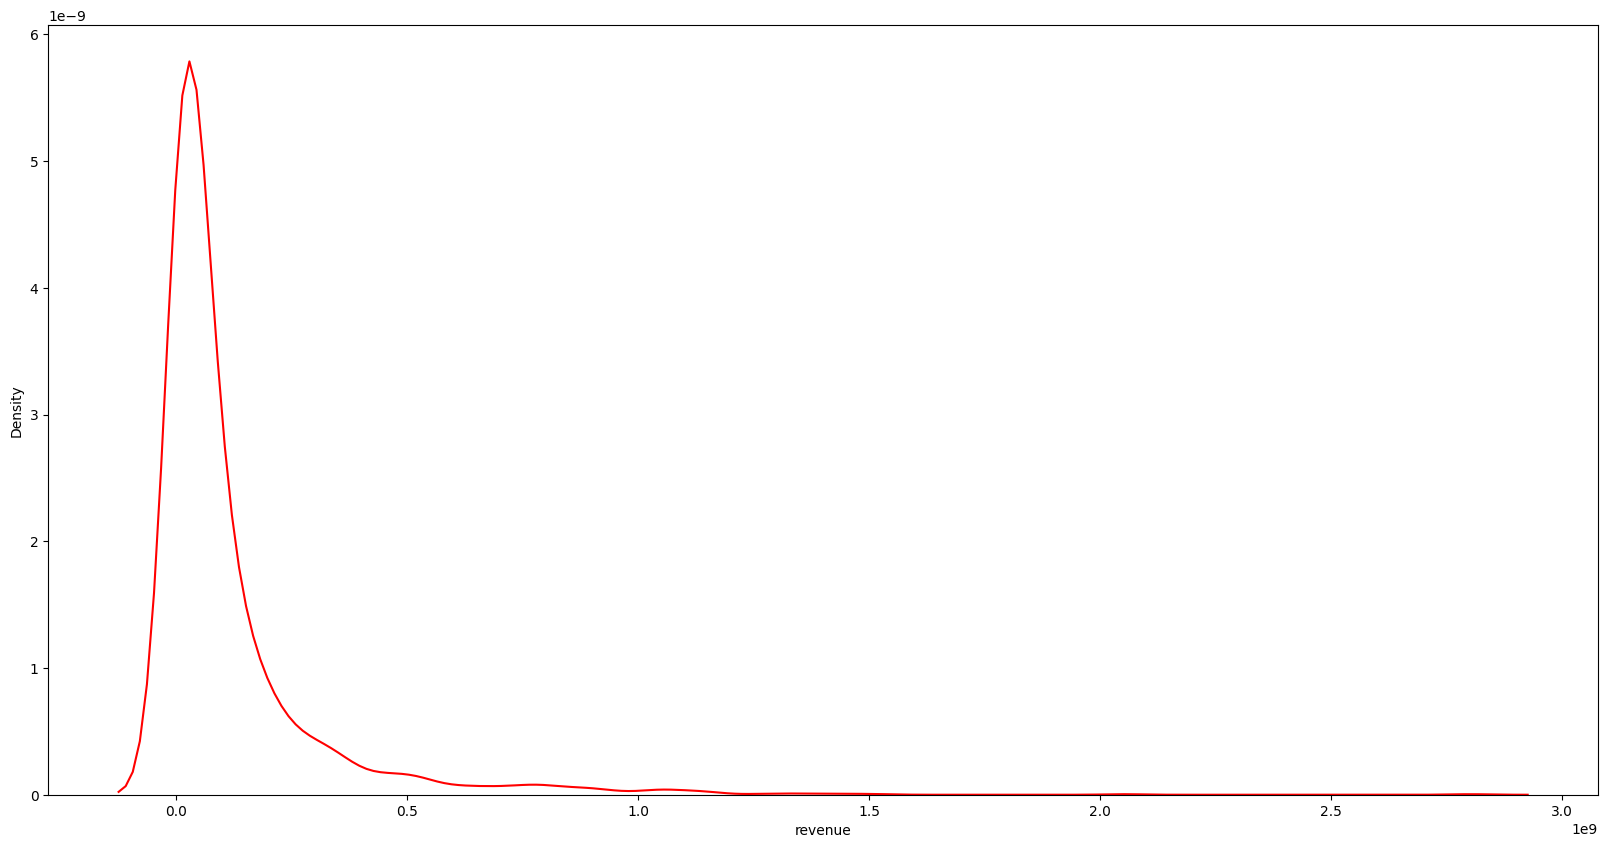

In [44]:
#ax = sns.histplot(data= movie_df['revenue'], bins=20, kde=True)

ax = sns.kdeplot(data = movie_df['revenue'], color= "red")
ax.figure.set_size_inches(20, 10)
#ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.show()

In [45]:
#heatmap_df = movie_df.drop(['movie_title', 'release_date', 'production_company', 'tomatometer_status'], axis= 1)
heatmap_df = pd.get_dummies(movie_df, columns=['genres', 'original_language', 'content_rating', 'release_decade'])
heatmap_df

,movie_title,vote_average,vote_count,release_date,revenue,budget,popularity,release_year,release_month,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,runtime,num_prod_companies,num_spoken_languages,num_prod_countries,num_directors,runtime_bins,genres_Action & Adventure,genres_Animation,genres_Art House & International,genres_Classics,genres_Comedy,genres_Cult Movies,genres_Documentary,genres_Drama,genres_Horror,genres_Kids & Family,genres_Musical & Performing Arts,genres_Mystery & Suspense,genres_Romance,genres_Science Fiction & Fantasy,genres_Western,original_language_da,original_language_de,original_language_en,original_language_es,original_language_fa,original_language_fr,original_language_hi,original_language_hu,original_language_it,original_language_ja,original_language_ko,original_language_ru,original_language_tr,original_language_zh,content_rating_G,content_rating_NC17,content_rating_NR,content_rating_PG,content_rating_PG-13,content_rating_R,release_decade_1920.0,release_decade_1930.0,release_decade_1940.0,release_decade_1950.0,release_decade_1960.0,release_decade_1970.0,release_decade_1980.0,release_decade_1990.0,release_decade_2000.0,release_decade_2010.0,release_decade_2020.0
0,Interstellar,8.417,32571,2014-11-05 00:00:00,701729206,165000000,140.241,2014.0,11.0,Paramount Pictures,Certified-Fresh,72.0,364.0,86.0,175957.0,62,263,101,167.0,3,1,2,1,160.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
1,Avengers: Infinity War,8.255,27713,2018-04-25 00:00:00,2052415039,300000000,154.340,2018.0,4.0,Walt Disney Pictures,Certified-Fresh,85.0,472.0,91.0,58720.0,57,400,72,149.0,1,2,1,1,140.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
2,Fight Club,8.438,27238,1999-10-15 00:00:00,100853753,63000000,69.498,1999.0,10.0,20th Century Fox,Certified-Fresh,79.0,173.0,96.0,1093242.0,40,137,36,139.0,7,1,1,1,130.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
3,Guardians of the Galaxy,7.906,26638,2014-07-30 00:00:00,772776600,170000000,33.255,2014.0,7.0,Walt Disney Pictures,Certified-Fresh,91.0,328.0,92.0,255582.0,59,300,28,121.0,1,1,1,1,120.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
4,Django Unchained,8.171,24672,2012-12-25 00:00:00,425368238,100000000,54.224,2012.0,12.0,The Weinstein Co.,Certified-Fresh,87.0,288.0,91.0,429231.0,55,250,38,165.0,2,3,1,1,160.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,The Sea of Grass,6.200,23,1947-04-25 00:00:00,4689000,2349000,3.541,1947.0,4.0,Warner H

In [46]:
heatmap_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2285 entries, 0 to 2324
Data columns (total 70 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   movie_title                       2285 non-null   object 
 1   vote_average                      2285 non-null   float64
 2   vote_count                        2285 non-null   int64  
 3   release_date                      2285 non-null   object 
 4   revenue                           2285 non-null   int64  
 5   budget                            2285 non-null   int64  
 6   popularity                        2285 non-null   float64
 7   release_year                      2285 non-null   float64
 8   release_month                     2285 non-null   float64
 9   production_company                2285 non-null   object 
 10  tomatometer_status                2285 non-null   object 
 11  tomatometer_rating                2285 non-null   float64
 12  tomatometer

In [47]:
# heatmap_df.drop(['movie_title'],axis=1,inplace=True)
# corr_matrix = heatmap_df.corr()

# corr_matrix = corr_matrix[['revenue']].drop(index='revenue').T

# plt.figure(figsize=(20, 10))
# sns.heatmap(corr_matrix, annot = True, cmap='coolwarm')

# plt.show()
# plt.tight_layout()

In [48]:
# corr_matrix.to_dict()


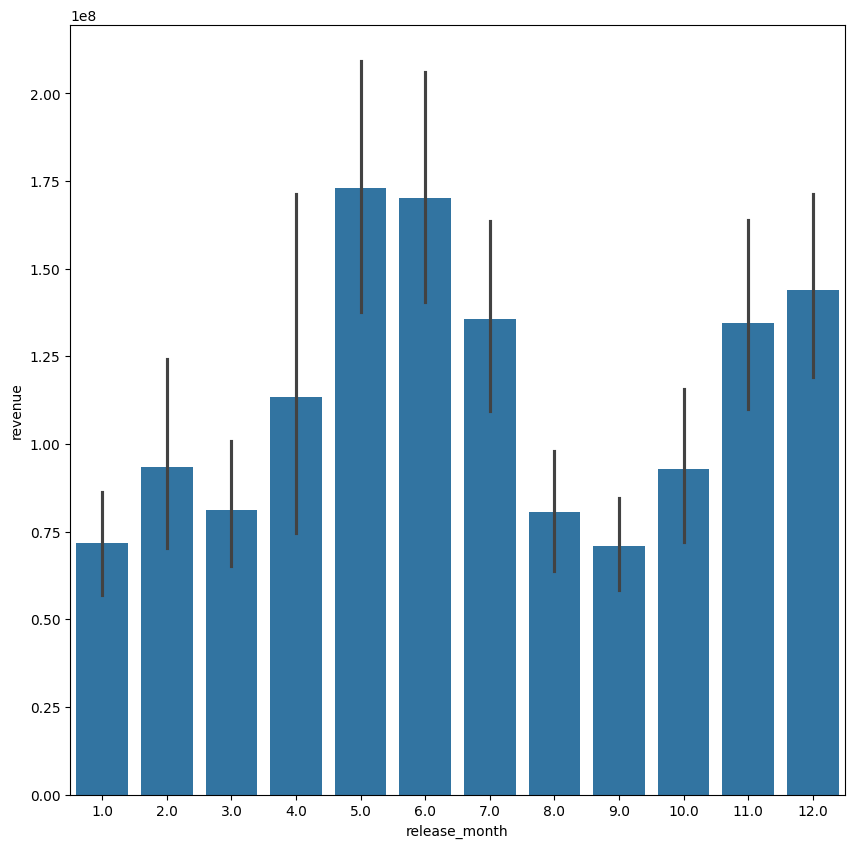

In [49]:
ax = sns.barplot(data= movie_df, x = 'release_month', y = 'revenue')
ax.figure.set_size_inches(10, 10)
#ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.show()

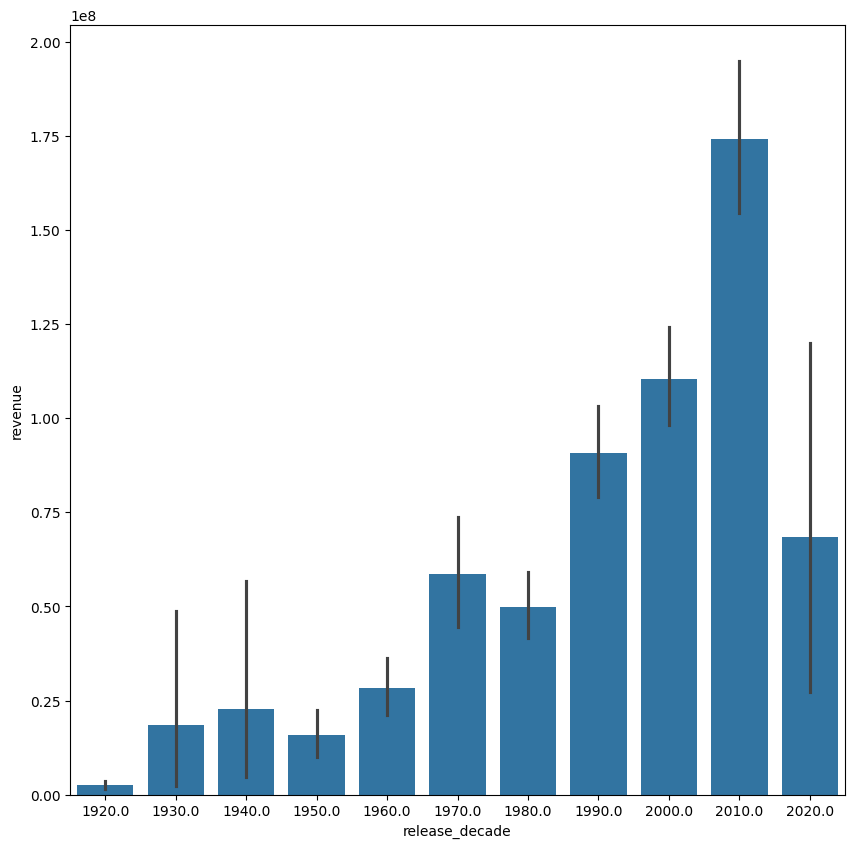

In [50]:
ax = sns.barplot(data= movie_df, x = 'release_decade', y = 'revenue')
ax.figure.set_size_inches(10, 10)
#ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.show()

## Model: Analysis, Hypothesis Testing, & ML

In [51]:
movie_df= pd.get_dummies(movie_df, columns=['genres', 'original_language', 'content_rating', 'release_decade'])
movie_df

,movie_title,vote_average,vote_count,release_date,revenue,budget,popularity,release_year,release_month,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,runtime,num_prod_companies,num_spoken_languages,num_prod_countries,num_directors,runtime_bins,genres_Action & Adventure,genres_Animation,genres_Art House & International,genres_Classics,genres_Comedy,genres_Cult Movies,genres_Documentary,genres_Drama,genres_Horror,genres_Kids & Family,genres_Musical & Performing Arts,genres_Mystery & Suspense,genres_Romance,genres_Science Fiction & Fantasy,genres_Western,original_language_da,original_language_de,original_language_en,original_language_es,original_language_fa,original_language_fr,original_language_hi,original_language_hu,original_language_it,original_language_ja,original_language_ko,original_language_ru,original_language_tr,original_language_zh,content_rating_G,content_rating_NC17,content_rating_NR,content_rating_PG,content_rating_PG-13,content_rating_R,release_decade_1920.0,release_decade_1930.0,release_decade_1940.0,release_decade_1950.0,release_decade_1960.0,release_decade_1970.0,release_decade_1980.0,release_decade_1990.0,release_decade_2000.0,release_decade_2010.0,release_decade_2020.0
0,Interstellar,8.417,32571,2014-11-05 00:00:00,701729206,165000000,140.241,2014.0,11.0,Paramount Pictures,Certified-Fresh,72.0,364.0,86.0,175957.0,62,263,101,167.0,3,1,2,1,160.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
1,Avengers: Infinity War,8.255,27713,2018-04-25 00:00:00,2052415039,300000000,154.340,2018.0,4.0,Walt Disney Pictures,Certified-Fresh,85.0,472.0,91.0,58720.0,57,400,72,149.0,1,2,1,1,140.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
2,Fight Club,8.438,27238,1999-10-15 00:00:00,100853753,63000000,69.498,1999.0,10.0,20th Century Fox,Certified-Fresh,79.0,173.0,96.0,1093242.0,40,137,36,139.0,7,1,1,1,130.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
3,Guardians of the Galaxy,7.906,26638,2014-07-30 00:00:00,772776600,170000000,33.255,2014.0,7.0,Walt Disney Pictures,Certified-Fresh,91.0,328.0,92.0,255582.0,59,300,28,121.0,1,1,1,1,120.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
4,Django Unchained,8.171,24672,2012-12-25 00:00:00,425368238,100000000,54.224,2012.0,12.0,The Weinstein Co.,Certified-Fresh,87.0,288.0,91.0,429231.0,55,250,38,165.0,2,3,1,1,160.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,The Sea of Grass,6.200,23,1947-04-25 00:00:00,4689000,2349000,3.541,1947.0,4.0,Warner H

In [52]:
movie_df_ml = movie_df.drop(['movie_title', 'vote_average', 'release_date', 'production_company', 'tomatometer_status', 'audience_count'], axis = 1)
movie_df_ml

,vote_count,revenue,budget,popularity,release_year,release_month,tomatometer_rating,tomatometer_count,audience_rating,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,runtime,num_prod_companies,num_spoken_languages,num_prod_countries,num_directors,runtime_bins,genres_Action & Adventure,genres_Animation,genres_Art House & International,genres_Classics,genres_Comedy,genres_Cult Movies,genres_Documentary,genres_Drama,genres_Horror,genres_Kids & Family,genres_Musical & Performing Arts,genres_Mystery & Suspense,genres_Romance,genres_Science Fiction & Fantasy,genres_Western,original_language_da,original_language_de,original_language_en,original_language_es,original_language_fa,original_language_fr,original_language_hi,original_language_hu,original_language_it,original_language_ja,original_language_ko,original_language_ru,original_language_tr,original_language_zh,content_rating_G,content_rating_NC17,content_rating_NR,content_rating_PG,content_rating_PG-13,content_rating_R,release_decade_1920.0,release_decade_1930.0,release_decade_1940.0,release_decade_1950.0,release_decade_1960.0,release_decade_1970.0,release_decade_1980.0,release_decade_1990.0,release_decade_2000.0,release_decade_2010.0,release_decade_2020.0
0,32571,701729206,165000000,140.241,2014.0,11.0,72.0,364.0,86.0,62,263,101,167.0,3,1,2,1,160.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
1,27713,2052415039,300000000,154.340,2018.0,4.0,85.0,472.0,91.0,57,400,72,149.0,1,2,1,1,140.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
2,27238,100853753,63000000,69.498,1999.0,10.0,79.0,173.0,96.0,40,137,36,139.0,7,1,1,1,130.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
3,26638,772776600,170000000,33.255,2014.0,7.0,91.0,328.0,92.0,59,300,28,121.0,1,1,1,1,120.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
4,24672,425368238,100000000,54.224,2012.0,12.0,87.0,288.0,91.0,55,250,38,165.0,2,3,1,1,160.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,23,4689000,2349000,3.541,1947.0,4.0,14.0,7.0,35.0,3,1,6,122.5,1,2,1,1,120.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2321,23,2368060,2000000,4.384,2012.0,10.0,88.0,50.0,64.0,22,44,6,101.0,2,1,1,1,100.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,F

In [53]:
movie_df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2285 entries, 0 to 2324
Data columns (total 64 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   vote_count                        2285 non-null   int64  
 1   revenue                           2285 non-null   int64  
 2   budget                            2285 non-null   int64  
 3   popularity                        2285 non-null   float64
 4   release_year                      2285 non-null   float64
 5   release_month                     2285 non-null   float64
 6   tomatometer_rating                2285 non-null   float64
 7   tomatometer_count                 2285 non-null   float64
 8   audience_rating                   2285 non-null   float64
 9   tomatometer_top_critics_count     2285 non-null   int64  
 10  tomatometer_fresh_critics_count   2285 non-null   int64  
 11  tomatometer_rotten_critics_count  2285 non-null   int64  
 12  runtime    

### Linear Regression

In [54]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

X = movie_df_ml.drop(['revenue'], axis= 1)
y = movie_df_ml['revenue']

kf = KFold(n_splits=10, shuffle=True, random_state=42)

lin_reg = LinearRegression()

mse_values = []
mae_values = []

for train_indices, test_indices in kf.split(X):
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

    lin_reg.fit(X_train, y_train)

    y_pred = lin_reg.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse_values.append(mse)
    mae_values.append(mae)

average_mse = np.mean(mse_values)
average_mae = np.mean(mae_values)

print("Average MSE Across Folds: " + str(np.sqrt(average_mse)))
print("Average MAE Across Folds: " + str(np.sqrt(average_mae)))

Average MSE Across Folds: 100171008.81853113
Average MAE Across Folds: 7673.008621362178


In [55]:
# y_pred = reg.predict(X_test)
# error = []
# index = 0
# for item in y_test:
#     error.append(abs(item - y_pred[index]))

# print("mean error:" +str(sum(error)/len(error)))

# print("mean value: "+str(sum(y_test)/len(y_test)))

# print("percent error:" + str((sum(error)/len(error))/(sum(y_test)/len(y_test))))




commenting below chunk out because kernel was crashing

In [56]:
#Don't run block yet have not one hot encoded/binned the revenue data, also it takes hella long, like I left it for 10 min and it did nothing, also 
#I need to look at the docs more closely, it might just be returning a normalized value from 0 to 1 instead of a class

# import tensorflow as tf 

# target = movie_df_ml.pop('revenue')

# numeric_feature_names = ["vote_average", "vote_count", "release_year", "tomatometer_rating", "tomatometer_count", "audience_rating", "audience_count"]
# numeric_features = movie_df_ml[numeric_feature_names]
    
# #converting the dataframe to something tensorflow can take as an input
# tf.convert_to_tensor(numeric_features)
# #Using arbitrarily sized hidden layers rn, will change later


# #normalizing the data as it's passed in I assume to a 0-1 range, but not sure
# normalizer = tf.keras.layers.Normalization(axis=-1)
# normalizer.adapt(numeric_features)



# def get_basic_model():
#   #initializing the model layers
#   model = tf.keras.Sequential([
#     normalizer,
#     tf.keras.layers.Dense(10, activation='relu'),
#     tf.keras.layers.Dense(10, activation='relu'),
#     tf.keras.layers.Dense(1)   #NEED TO BIN VALUES/ONE HOT ENCODE THEM
#   ])
#   #setting loss function, not sure what optimizer is
#   model.compile(optimizer='adam',
#                 loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#                 metrics=['accuracy'])
#   return model

# model = get_basic_model()
# model.fit(numeric_features, target, epochs=15, batch_size=5)

### K-Nearest Neighbors



11
Average MSE Across Folds: 70831599.61388083
Average MAE Across Folds: 29437530.66244291


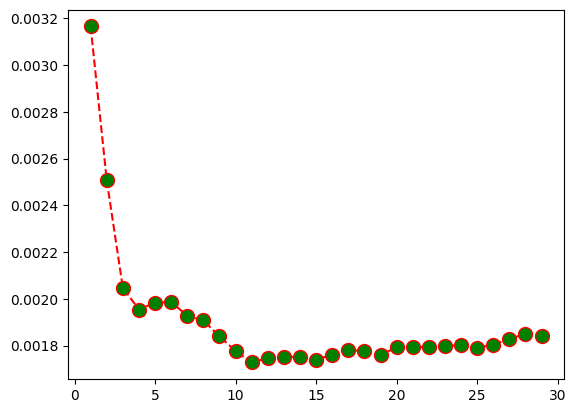

In [57]:


scaler = MinMaxScaler()

scaled_revenue = scaler.fit_transform(movie_df_ml[['revenue']])
movie_df_ml['revenue']=scaled_revenue
X = movie_df_ml.drop(['revenue'], axis= 1)

y = movie_df_ml[ "revenue"]


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

# Finding the best K value for KNN
K_values=range(1,30)
scores=[]
for k in K_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(x_train, y_train)
    y_pred=knn_regressor.predict(x_test)
    scores.append(mean_squared_error(y_pred, y_test))
best_knn_val = K_values[np.argmin(scores)]
print(best_knn_val)
plt.plot(K_values,scores, color='red', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)




k_cross_validation = KFold(n_splits=6, shuffle=True, random_state=42)

knn_regressor = KNeighborsRegressor(n_neighbors=best_knn_val)
K_values_lst=[]
mse=[]
mae=[]
for train_indices, test_indices in kf.split(X):
    x_train, x_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    knn_regressor.fit(x_train, y_train)
    y_pred=knn_regressor.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse_values.append(mse)
    mae_values.append(mae)


average_mse = np.mean(mse_values)
average_mae = np.mean(mae_values)

print("Average MSE Across Folds: " + str(np.sqrt(average_mse)))
print("Average MAE Across Folds: " + str(average_mae))








## Interpretation: Insight & Policy Decision

In [58]:
# Code